# Bank Marketing을 위한 데이터 시각화

- ## 고객 데이터 EDA및 기초 통계분석,
- ## 마케팅 전략 구축
- ## 예측 모델링과 평가


# 0. Import Libraries


In [82]:
import os
import warnings
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import (
    LabelEncoder,
    MinMaxScaler,
    StandardScaler,
    OneHotEncoder,
)
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
)
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# CPU 수 제한 설정
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# 경고 메시지 필터링 설정
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Read Data

### https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset


In [83]:
banking_data = pd.read_csv("bank.csv")
banking_data.head(10)

age         job   marital  education default  balance housing loan  \
0   59      admin.   married  secondary      no     2343     yes   no   
1   56      admin.   married  secondary      no       45      no   no   
2   41  technician   married  secondary      no     1270     yes   no   
3   55    services   married  secondary      no     2476     yes   no   
4   54      admin.   married   tertiary      no      184      no   no   
5   42  management    single   tertiary      no        0     yes  yes   
6   56  management   married   tertiary      no      830     yes  yes   
7   60     retired  divorced  secondary      no      545     yes   no   
8   37  technician   married  secondary      no        1     yes   no   
9   28    services    single  secondary      no     5090     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may      1042         1     -1         0  unknown     yes  
1  unknown    5   may      1467         1     -1         0  unknown     yes  
2  unknown    5   may      1389         1     -1         0  unknown     yes  
3  unknown    5   may       579         1     -1         0  unknown     yes  
4  unknown    5   may       673         2     -1         0  unknown     yes  
5  unknown    5   may       562         2     -1         0  unknown     yes  
6  unknown    6   may      1201         1     -1         0  unknown     yes  
7  unknown    6   may      1030         1     -1         0  unknown     yes  
8  unknown    6   may       608         1     -1         0  unknown     yes  
9  unknown    6   may      1297         3     -1         0  unknown     yes

In [165]:
banking_data.shape

(11162, 17)

In [84]:
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# 2. EDA & Statistical Analyze


In [85]:
print("수치형 데이터에 대한 기초 통계량:")
print(banking_data.describe())

수치형 데이터에 대한 기초 통계량:
                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750

In [86]:
print("\n범주형 데이터에 대한 기초 통계량:")
print(banking_data.describe(include=["object"]))


범주형 데이터에 대한 기초 통계량:
               job  marital  education default housing   loan   contact  \
count        11162    11162      11162   11162   11162  11162     11162   
unique          12        3          4       2       2      2         3   
top     management  married  secondary      no      no     no  cellular   
freq          2566     6351       5476   10994    5881   9702      8042   

        month poutcome deposit  
count   11162    11162   11162  
unique     12        4       2  
top       may  unknown      no  
freq     2824     8326    5873  


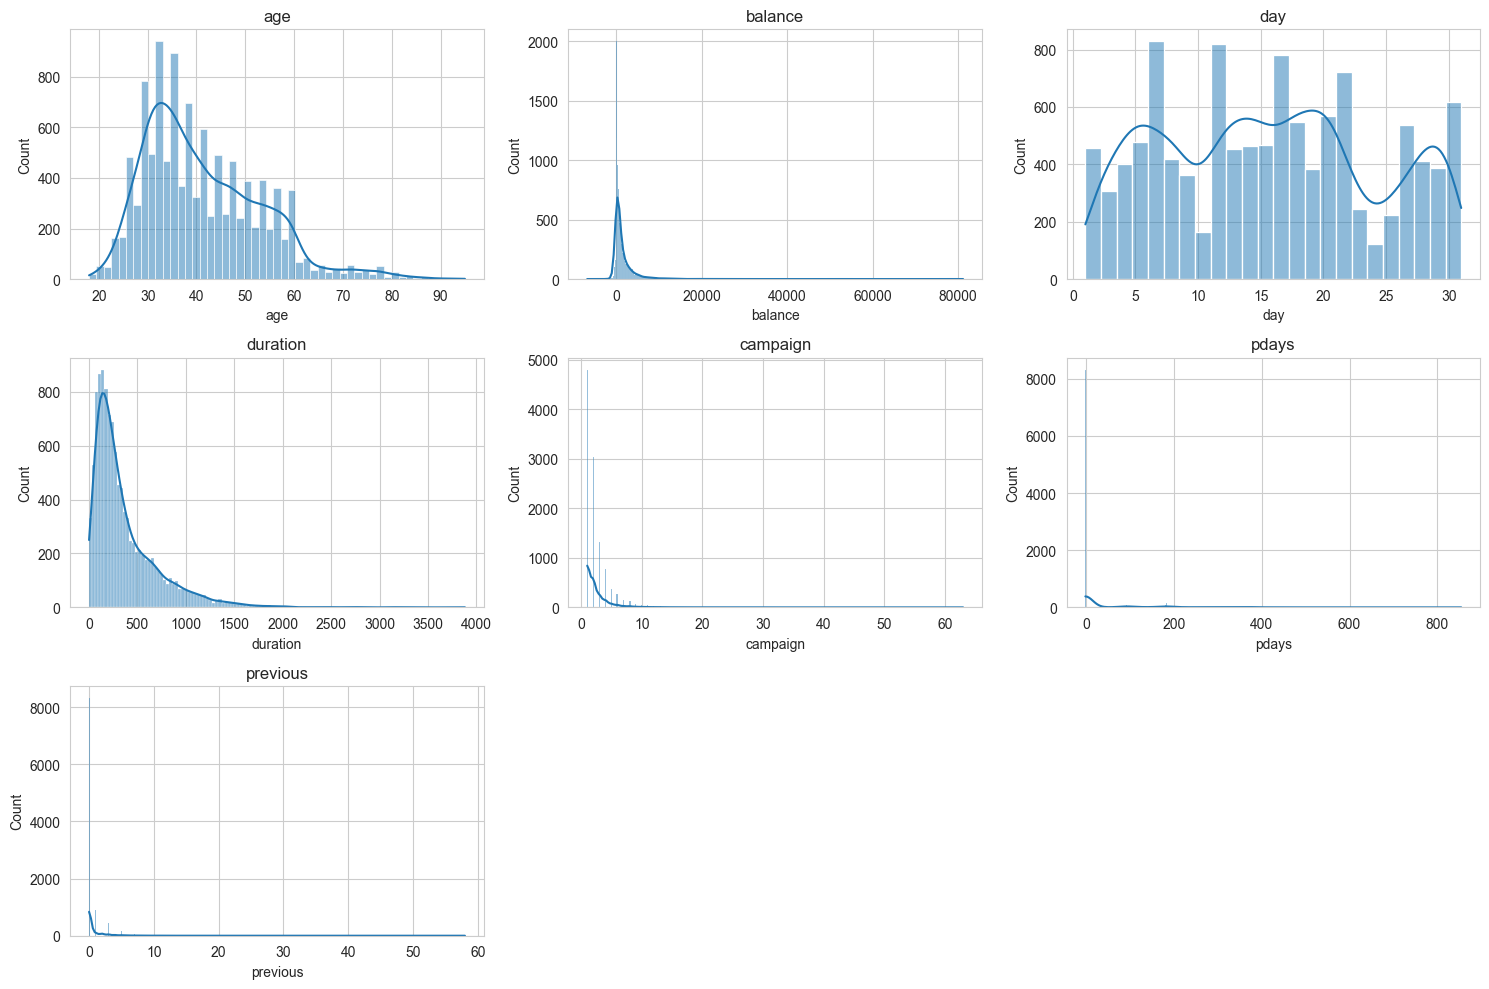

In [87]:
numeric_columns = banking_data.select_dtypes(include=["int64", "float64"]).columns


plt.figure(figsize=(15, 10))


for i, column in enumerate(numeric_columns, 1):


    plt.subplot(3, 3, i)


    sns.histplot(banking_data[column], kde=True)
    plt.title(column)


plt.tight_layout()


plt.show()

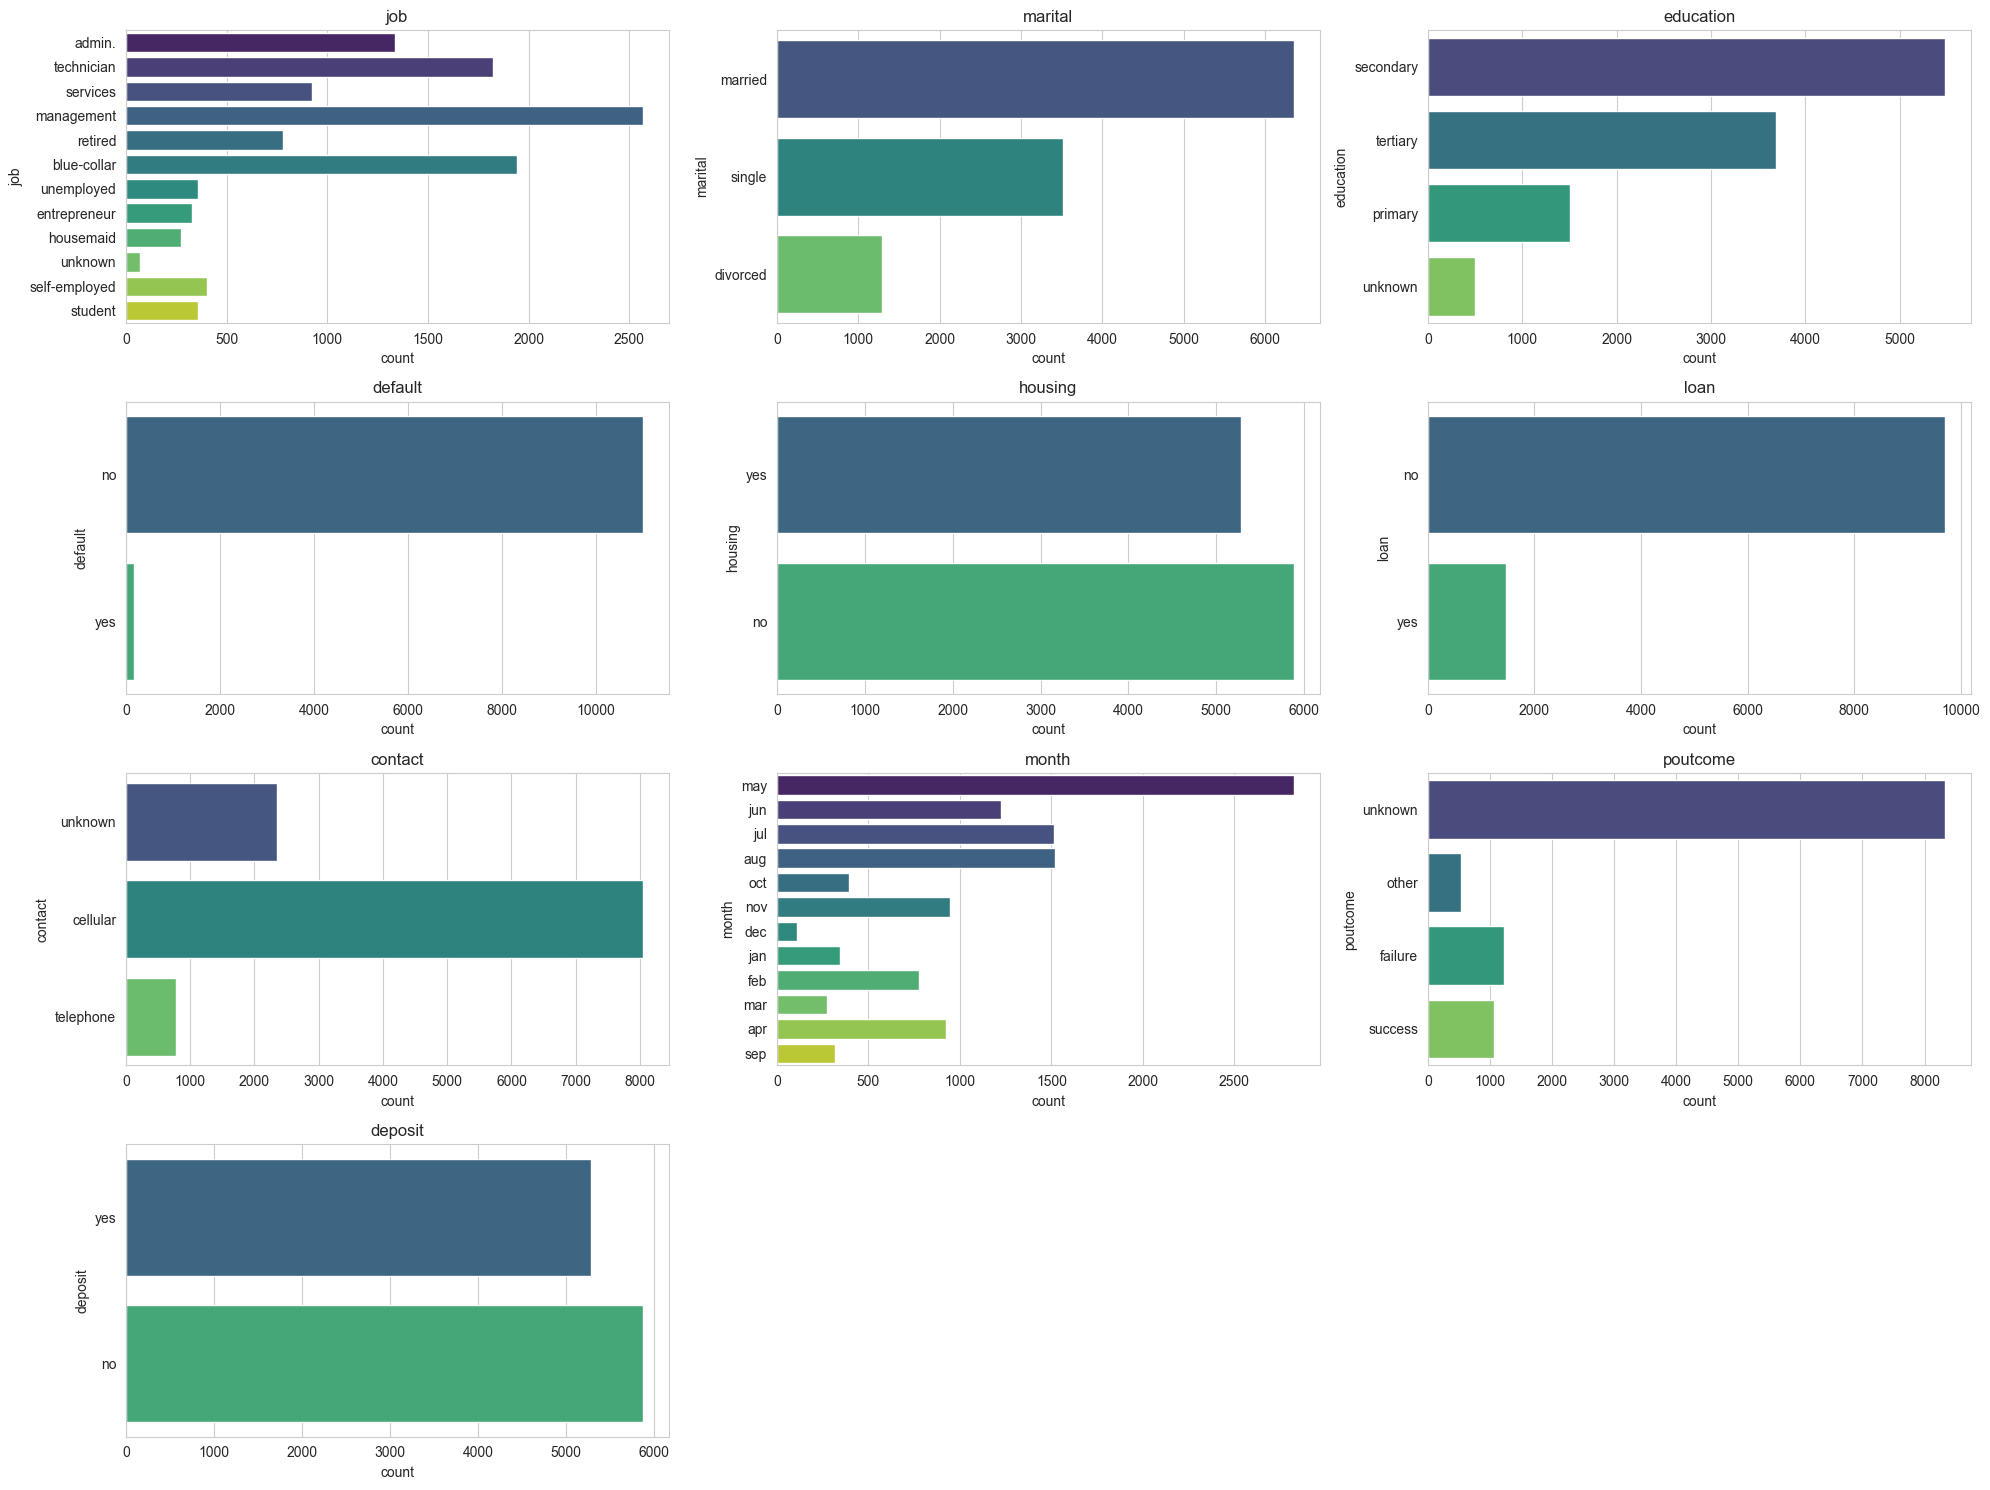

In [88]:
# 범주형 변수 분포 시각화
categorical_columns = banking_data.select_dtypes(include=["object"]).columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(y=banking_data[column], palette="viridis")
    plt.title(column)
    plt.tight_layout()
plt.show()

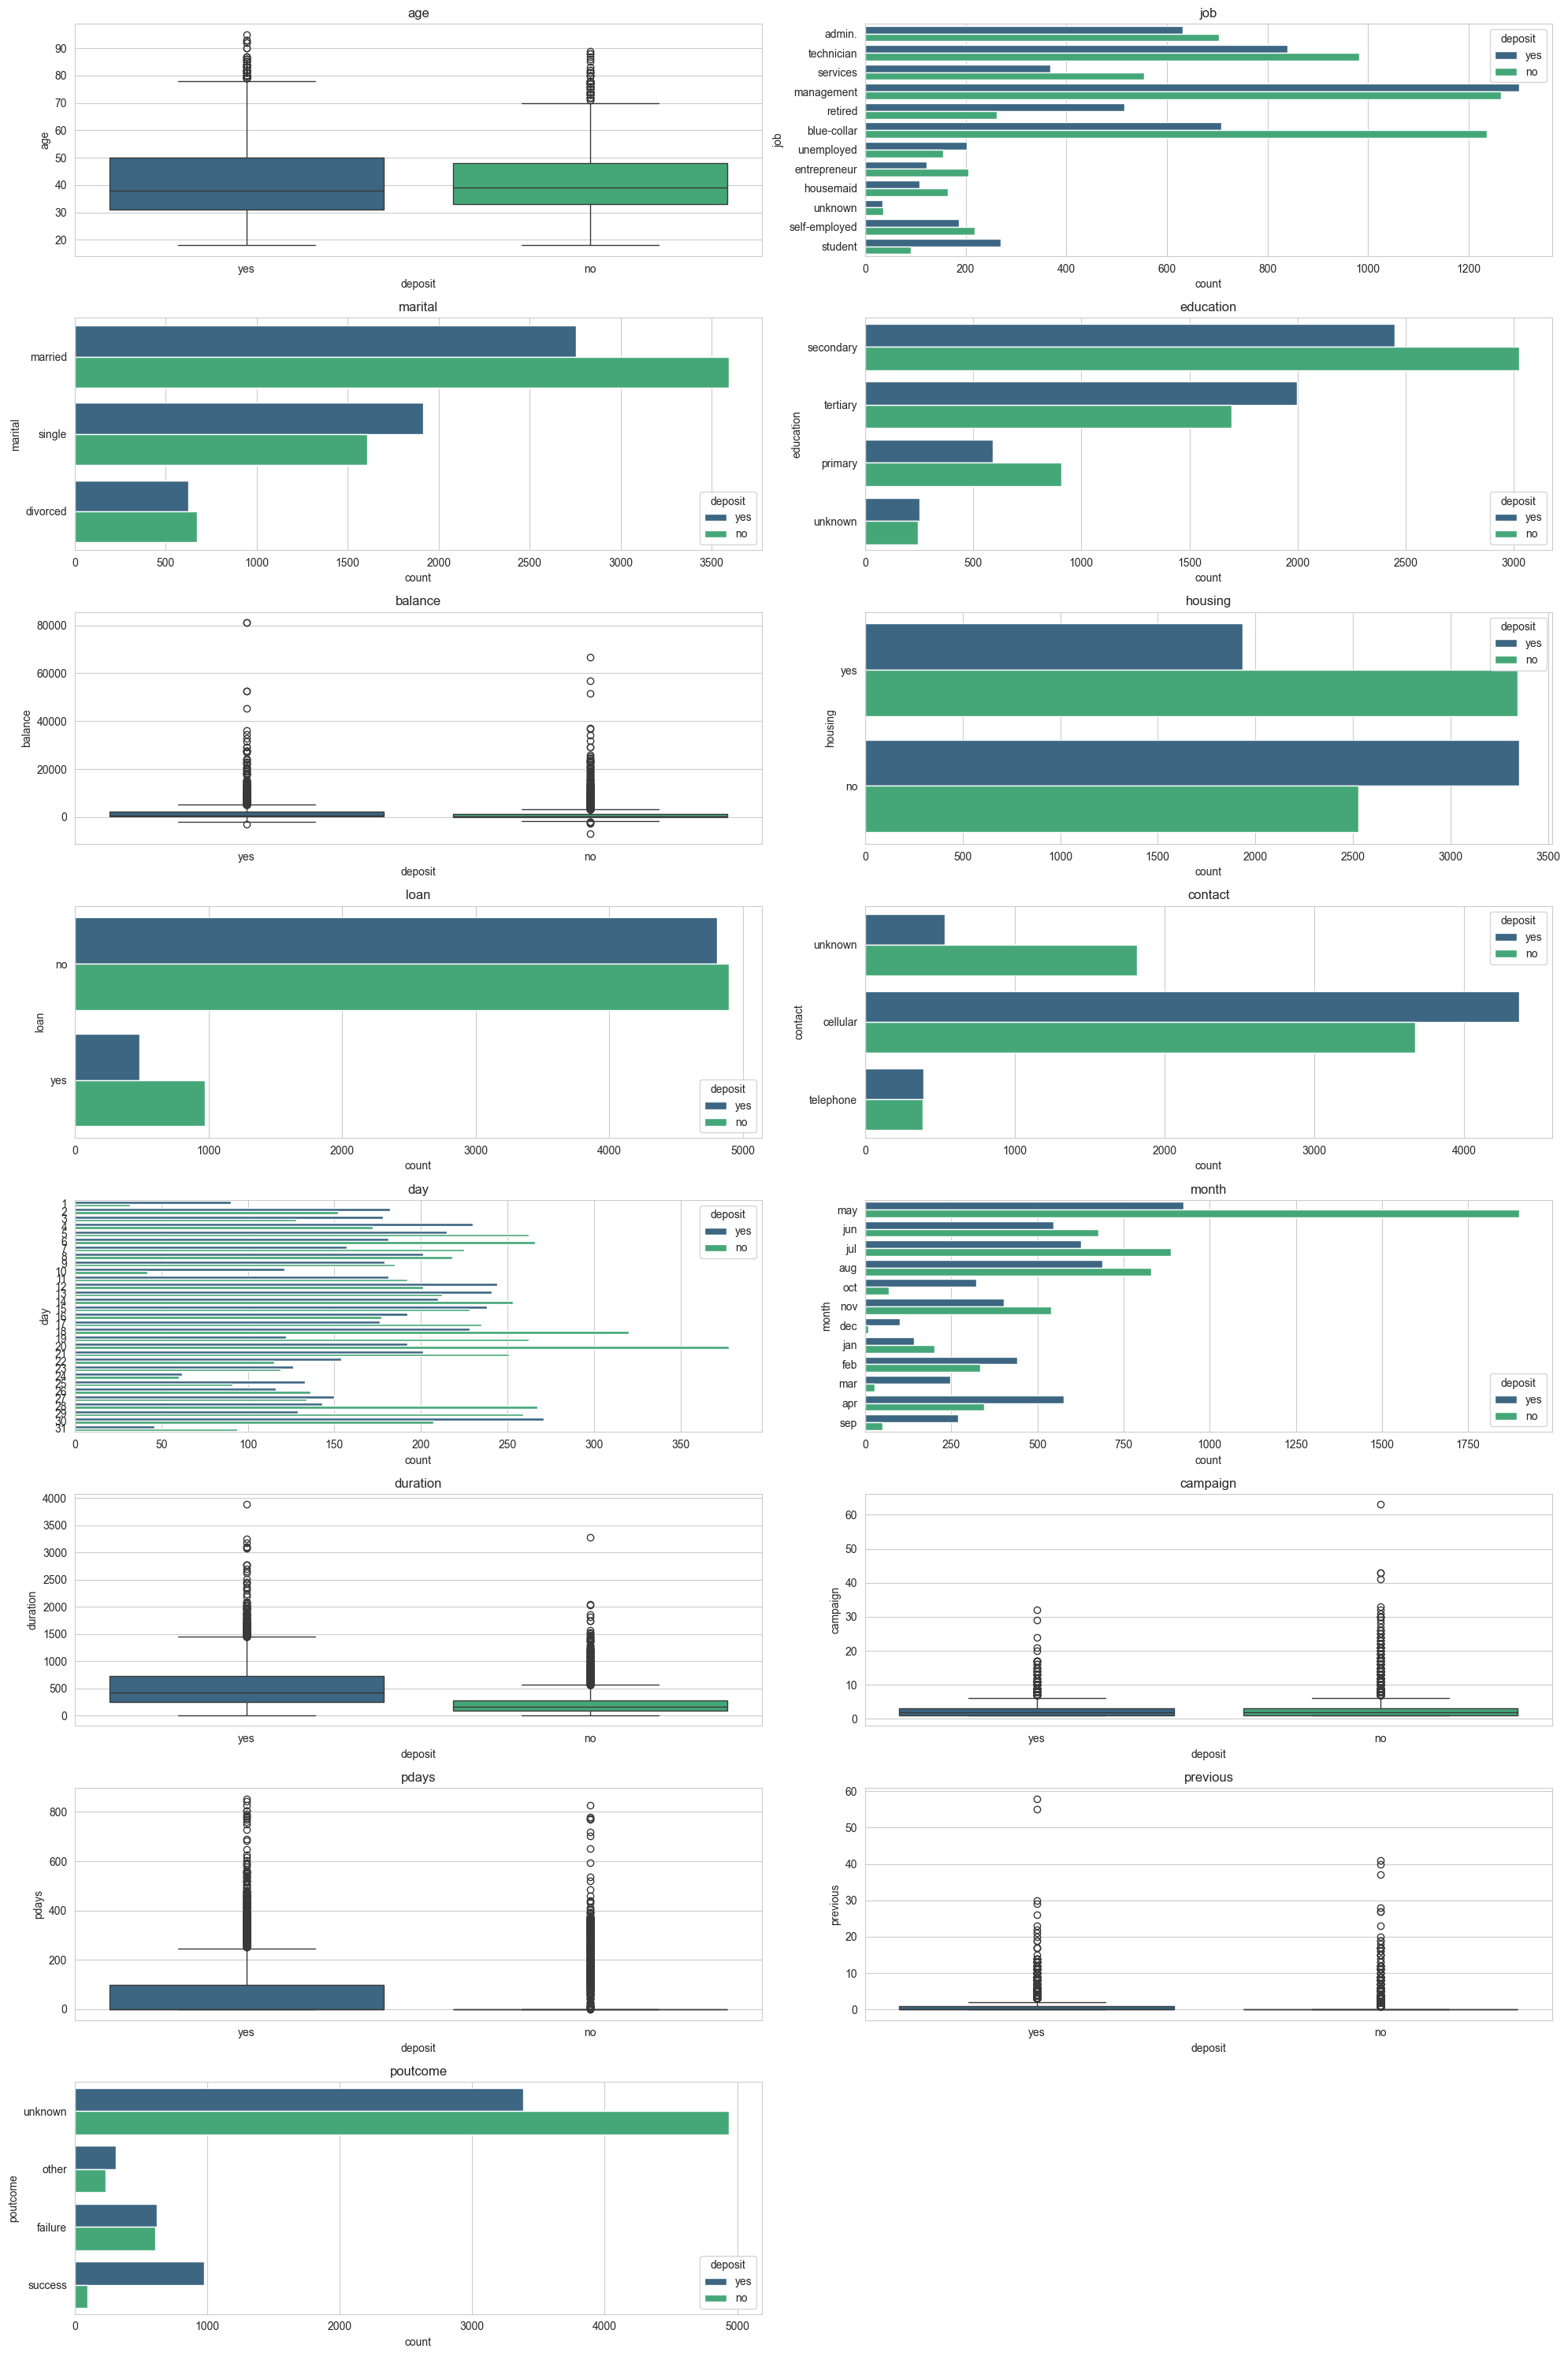

In [89]:
# 시각화를 위한 스타일 설정
sns.set_style("whitegrid")

# 시각화할 변수 목록을 정의
columns_to_explore = [
    "age",
    "job",
    "marital",
    "education",
    "balance",
    "housing",
    "loan",
    "contact",
    "day",
    "month",
    "duration",
    "campaign",
    "pdays",
    "previous",
    "poutcome",
]

# 각 변수에 대한 시각화를 생성.
plt.figure(figsize=(20, 30))  # 전체 그래프의 크기를 설정

# 선택한 변수들에 대해 시각화를 반복
for index, column in enumerate(columns_to_explore, start=1):
    plt.subplot(8, 2, index)  # subplot을 이용하여 여러 그래프를 배열

    # 범주형 변수일 경우 countplot을 사용
    if banking_data[column].dtype == "object" or column == "day" or column == "month":
        sns.countplot(y=column, hue="deposit", data=banking_data, palette="viridis")

    # 수치형 변수일 경우 boxplot을 사용
    else:
        sns.boxplot(x="deposit", y=column, data=banking_data, palette="viridis")

    plt.title(column)  # 각 그래프의 제목을 설정
    plt.tight_layout()  # 그래프들이 겹치지 않게 레이아웃을 조정


plt.show()  # 모든 그래프를 출력

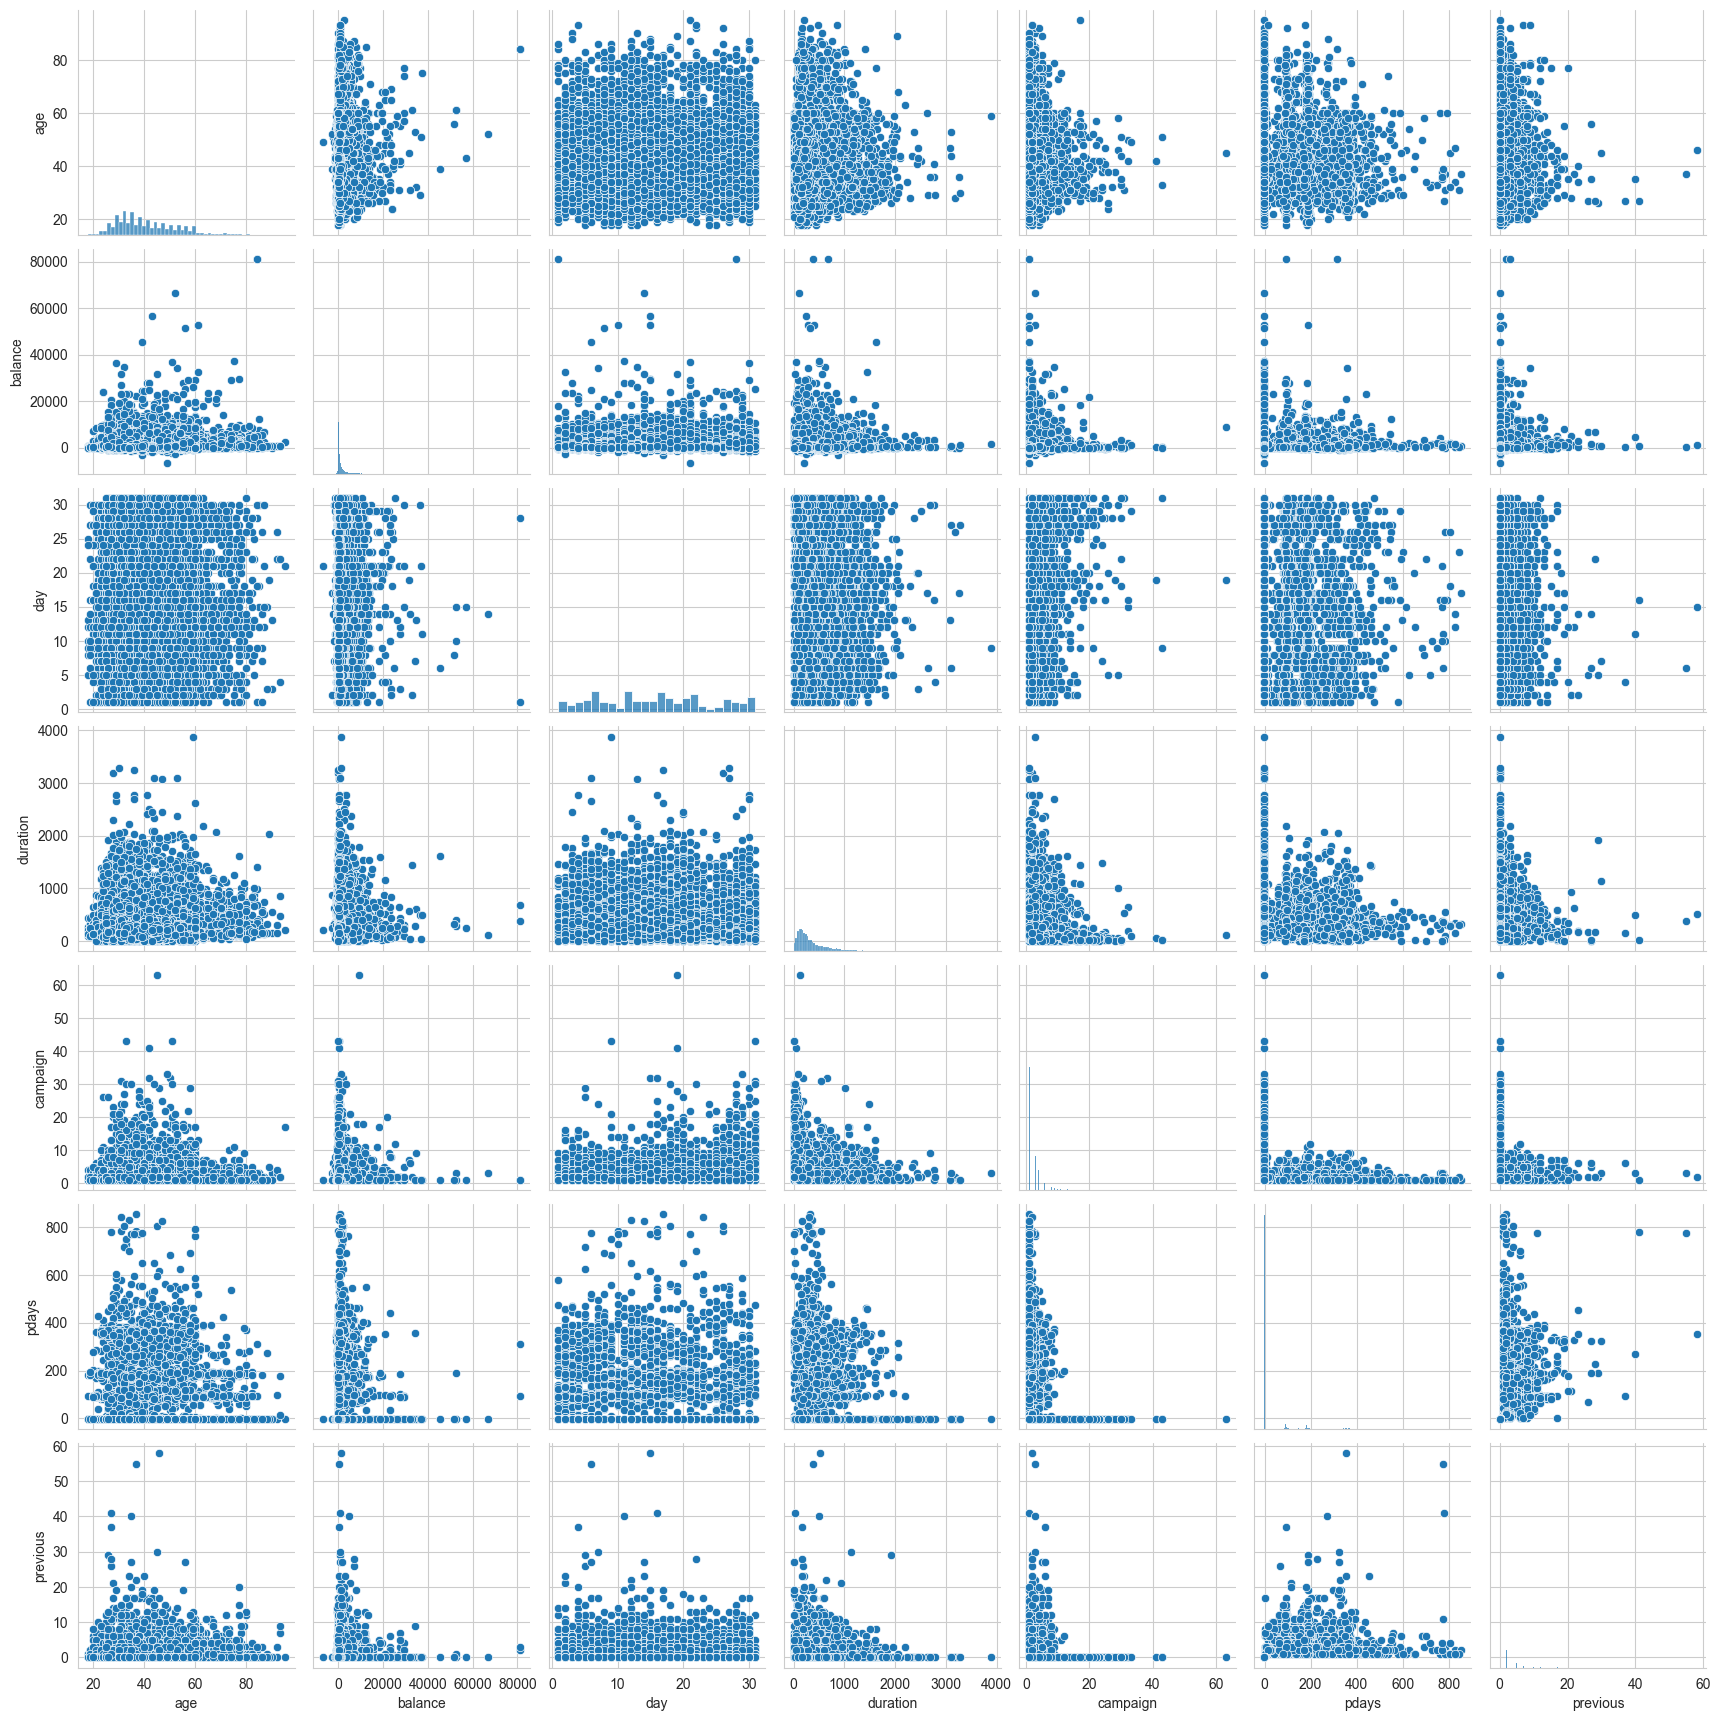

In [90]:
sns.pairplot(banking_data)
plt.show()

In [91]:
cor = banking_data[numeric_columns].corr()
cor

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.112300 -0.000762  0.000189 -0.005278  0.002774  0.020169
balance   0.112300  1.000000  0.010467  0.022436 -0.013894  0.017411  0.030805
day      -0.000762  0.010467  1.000000 -0.018511  0.137007 -0.077232 -0.058981
duration  0.000189  0.022436 -0.018511  1.000000 -0.041557 -0.027392 -0.026716
campaign -0.005278 -0.013894  0.137007 -0.041557  1.000000 -0.102726 -0.049699
pdays     0.002774  0.017411 -0.077232 -0.027392 -0.102726  1.000000  0.507272
previous  0.020169  0.030805 -0.058981 -0.026716 -0.049699  0.507272  1.000000

<Axes: >

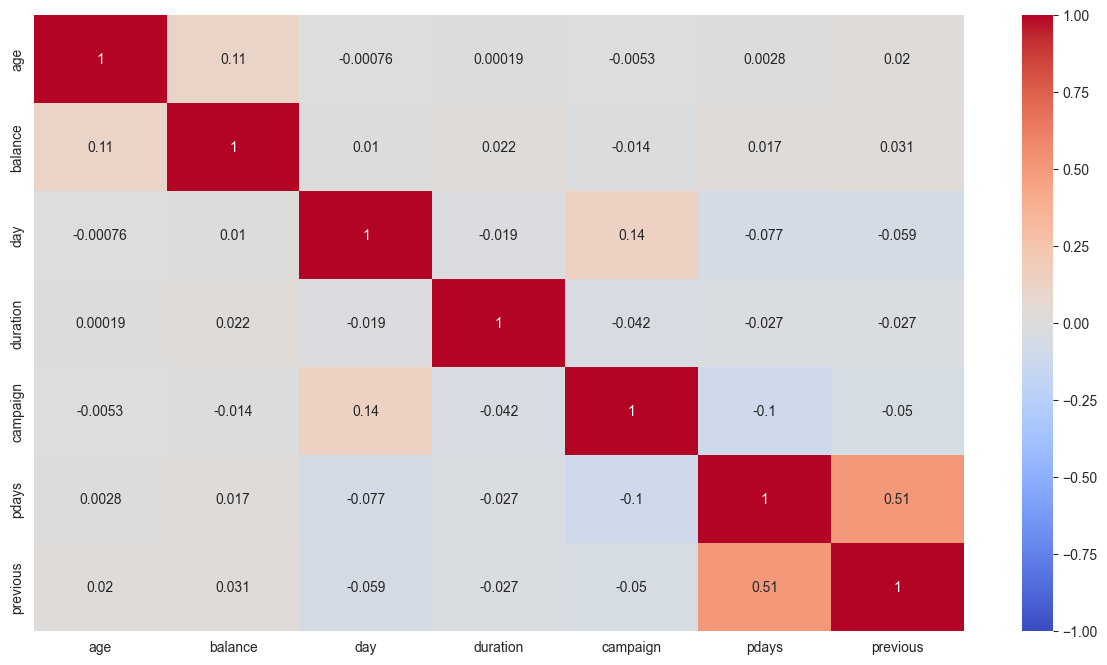

In [92]:
plt.figure(figsize=(15, 8))
sns.heatmap(cor, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# 3. Marketing Strategy


In [93]:
banking_data = pd.read_csv("bank.csv")
banking_data = banking_data[
    [
        "age",
        "job",
        "marital",
        "education",
        "default",
        "balance",
        "housing",
        "loan",
        "pdays",
        "deposit",
    ]
]


banking_data = banking_data[banking_data["pdays"] == -1]


banking_data["marital_new"] = banking_data["marital"].apply(
    lambda x: 0 if x == "divorced" else (1 if x == "married" else 0)
)


banking_data["education_new"] = banking_data["education"].apply(
    lambda x: (
        1
        if x == "primary"
        else (2 if x == "secondary" else (3 if x == "tertiary" else 0))
    )
)


banking_data.replace("yes", 1, inplace=True)
banking_data.replace("no", 0, inplace=True)
banking_data["generation"] = np.floor(banking_data["age"] / 10).astype(int)
banking_data.drop("pdays", axis=1, inplace=True)
banking_data = banking_data.replace("divorced", "single")

# 'unknown'을 NaN으로 대체
banking_data.replace("unknown", np.nan, inplace=True)


# NaN 값을 포함하는 행 제거
banking_data = banking_data.dropna()

In [94]:
banking_data_2 = banking_data.drop(["marital", "education"], axis=1)

In [95]:
banking_data_2_1 = banking_data_2

mask_1 = banking_data_2_1["age"] > 29
mask_2 = banking_data_2_1["age"] < 60

banking_data_2_1 = banking_data_2_1[mask_1 & mask_2]
banking_data_2_1.describe()

age      default       balance      housing         loan  \
count  6415.000000  6415.000000   6415.000000  6415.000000  6415.000000   
mean     41.489634     0.019018   1411.148714     0.510210     0.153702   
std       8.495281     0.136599   2949.924784     0.499935     0.360691   
min      30.000000     0.000000  -6847.000000     0.000000     0.000000   
25%      34.000000     0.000000     83.000000     0.000000     0.000000   
50%      40.000000     0.000000    483.000000     1.000000     0.000000   
75%      48.000000     0.000000   1560.000000     1.000000     0.000000   
max      59.000000     1.000000  66653.000000     1.000000     1.000000   

           deposit  marital_new  education_new   generation  
count  6415.000000  6415.000000    6415.000000  6415.000000  
mean      0.361964     0.622136       2.185814     3.728449  
std       0.480606     0.484891       0.675708     0.791969  
min       0.000000     0.000000       1.000000     3.000000  
25%       0.000000     0.000000       2.000000     3.000000  
50%       0.000000     1.000000       2.000000     4.000000  
75%       1.000000     1.000000       3.000000     4.000000  
max       1.000000     1.000000       3.000000     5.000000

In [96]:
banking_data_2_1[["age", "default", "balance", "housing", "loan", "marital_new"]]

age  default  balance  housing  loan  marital_new
0       59        0     2343        1     0            1
1       56        0       45        0     0            1
2       41        0     1270        1     0            1
3       55        0     2476        1     0            1
4       54        0      184        0     0            1
...    ...      ...      ...      ...   ...          ...
11156   34        0      -72        1     0            0
11157   33        0        1        1     0            0
11158   39        0      733        0     0            1
11159   32        0       29        0     0            0
11161   34        0        0        0     0            1

[6415 rows x 6 columns]

나이별로 적금 신청 비율이 달라지는 이유를 찾고 있음

banking_data_2_1 : 30대 ~ 50대

banking_data_2_2 : ~ 20대, 60대 ~


In [97]:
banking_data_2_1

age          job  default  balance  housing  loan  deposit  \
0       59       admin.        0     2343        1     0        1   
1       56       admin.        0       45        0     0        1   
2       41   technician        0     1270        1     0        1   
3       55     services        0     2476        1     0        1   
4       54       admin.        0      184        0     0        1   
...    ...          ...      ...      ...      ...   ...      ...   
11156   34  blue-collar        0      -72        1     0        0   
11157   33  blue-collar        0        1        1     0        0   
11158   39     services        0      733        0     0        0   
11159   32   technician        0       29        0     0        0   
11161   34   technician        0        0        0     0        0   

       marital_new  education_new  generation  
0                1              2           5  
1                1              2           5  
2                1              2           4  
3                1              2           5  
4                1              3           5  
...            ...            ...         ...  
11156            0              2           3  
11157            0              1           3  
11158            1              2           3  
11159            0              2           3  
11161            1              2           3  

[6415 rows x 10 columns]

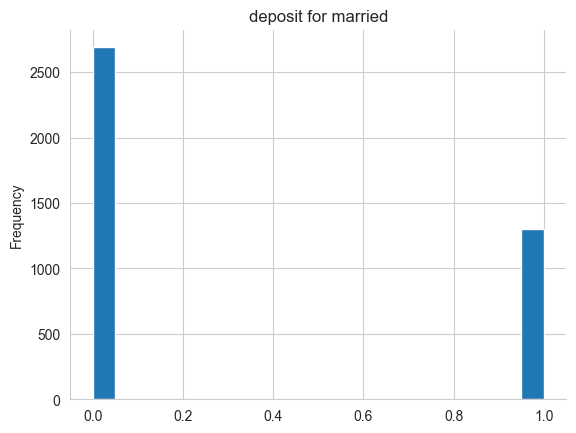

In [98]:
banking_data_2_1[banking_data_2_1["marital_new"] == 1]["deposit"].plot(
    kind="hist", bins=20, title="deposit for married"
)


plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)

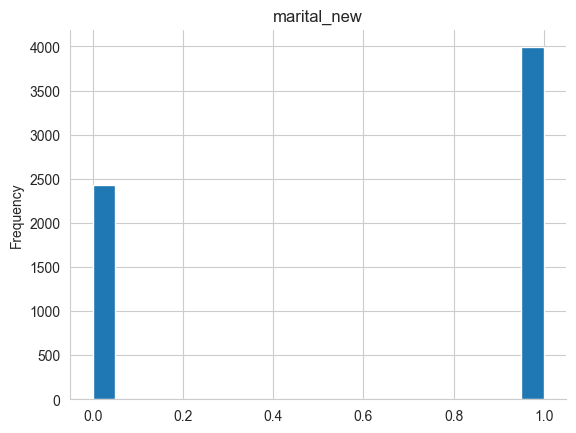

In [99]:
banking_data_2_1[["age", "default", "balance", "housing", "loan", "marital_new"]][
    "marital_new"
].plot(kind="hist", bins=20, title="marital_new")


plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)

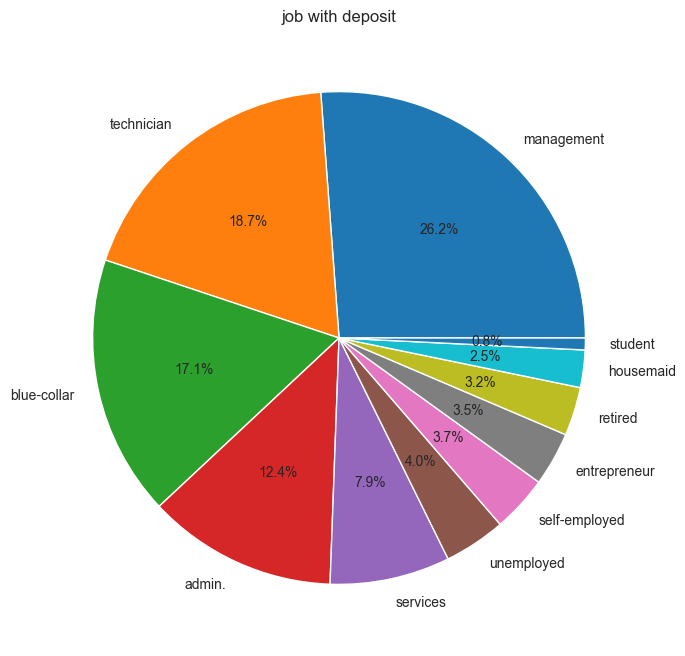

In [100]:
# 'deposit'이 1인 행만 필터링하고, 'job' 발생 빈도를 계산
job_counts = banking_data_2_1[banking_data_2_1["deposit"] == 1]["job"].value_counts()

# 파이 차트 생성
plt.figure(figsize=(8, 8))  # 보다 나은 가시성을 위해 그래프 크기 설정
job_counts.plot(kind="pie", title="job with deposit", autopct="%1.1f%%")
plt.ylabel("")  # 파이 차트에서는 일반적으로 y-라벨이 필요 없으므로 제거
plt.show()

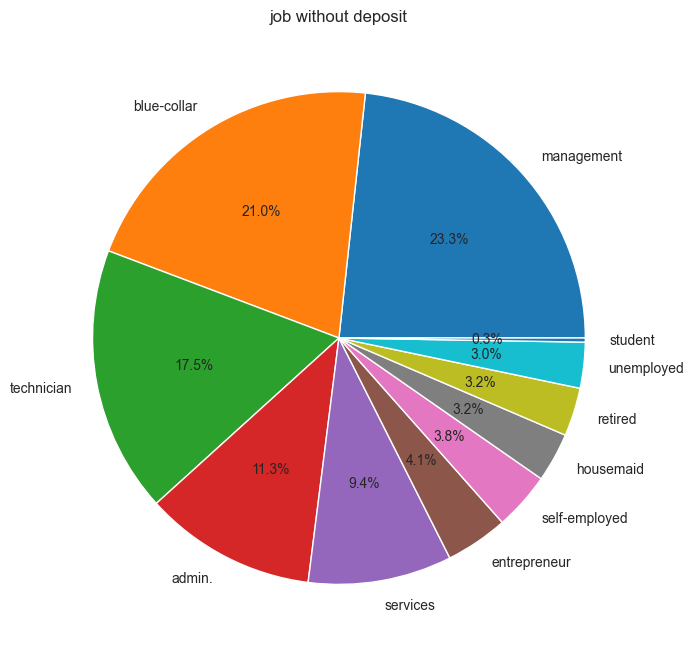

In [101]:
# 'deposit'이 0인 행만 필터링하고, 'job' 발생 빈도를 계산
job_counts = banking_data_2_1[banking_data_2_1["deposit"] == 0]["job"].value_counts()

# 파이 차트 생성
plt.figure(figsize=(8, 8))  # 보다 나은 가시성을 위해 그래프 크기 설정
job_counts.plot(kind="pie", title="job without deposit", autopct="%1.1f%%")
plt.ylabel("")  # 파이 차트에서는 일반적으로 y-라벨이 필요 없으므로 제거
plt.show()

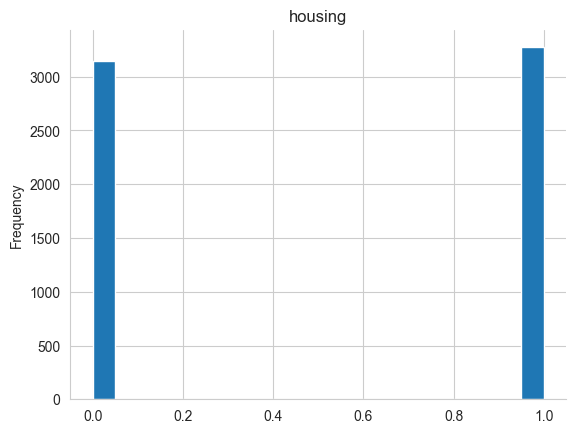

In [102]:
banking_data_2_1[["age", "default", "balance", "housing", "loan"]]["housing"].plot(
    kind="hist", bins=20, title="housing"
)


plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)

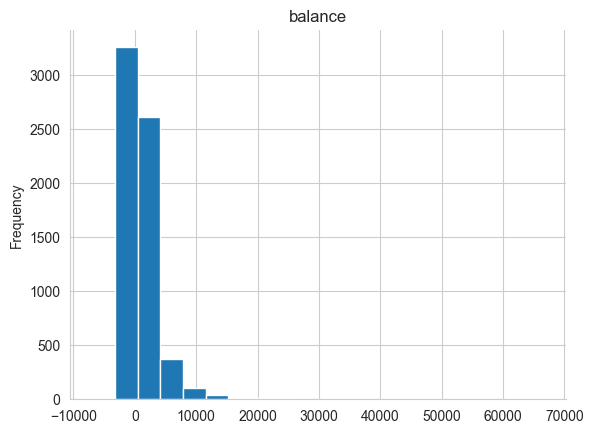

In [103]:
banking_data_2_1[["age", "default", "balance", "housing", "loan"]]["balance"].plot(
    kind="hist", bins=20, title="balance"
)


plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)

In [104]:
banking_data_2_2 = banking_data_2

mask_1 = banking_data_2_2["age"] < 30
mask_2 = banking_data_2_2["age"] > 59

banking_data_2_2 = banking_data_2_2[mask_1 | mask_2]
banking_data_2_2.describe()

age      default       balance      housing         loan  \
count  1524.000000  1524.000000   1524.000000  1524.000000  1524.000000   
mean     38.258530     0.017717   1494.869423     0.387795     0.116798   
std      19.013423     0.131962   3297.978200     0.487407     0.321285   
min      18.000000     0.000000  -1042.000000     0.000000     0.000000   
25%      26.000000     0.000000    119.000000     0.000000     0.000000   
50%      28.000000     0.000000    507.000000     0.000000     0.000000   
75%      60.000000     0.000000   1597.500000     1.000000     0.000000   
max      95.000000     1.000000  52587.000000     1.000000     1.000000   

           deposit  marital_new  education_new   generation  
count  1524.000000  1524.000000    1524.000000  1524.000000  
mean      0.590551     0.363517       2.139108     3.270997  
std       0.491894     0.481170       0.654551     2.049787  
min       0.000000     0.000000       1.000000     1.000000  
25%       0.000000     0.000000       2.000000     2.000000  
50%       1.000000     0.000000       2.000000     2.000000  
75%       1.000000     1.000000       3.000000     6.000000  
max       1.000000     1.000000       3.000000     9.000000

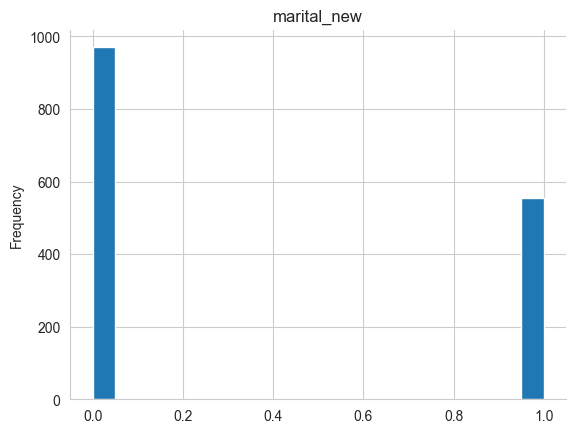

In [105]:
banking_data_2_2[["age", "default", "balance", "housing", "loan", "marital_new"]][
    "marital_new"
].plot(kind="hist", bins=20, title="marital_new")


plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)

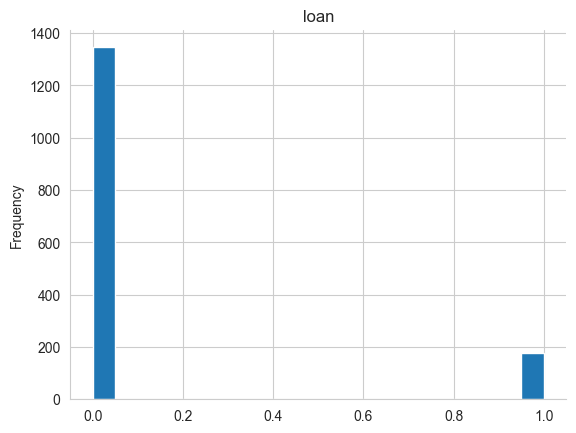

In [106]:
banking_data_2_2[["age", "default", "balance", "housing", "loan"]]["loan"].plot(
    kind="hist", bins=20, title="loan"
)


plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)

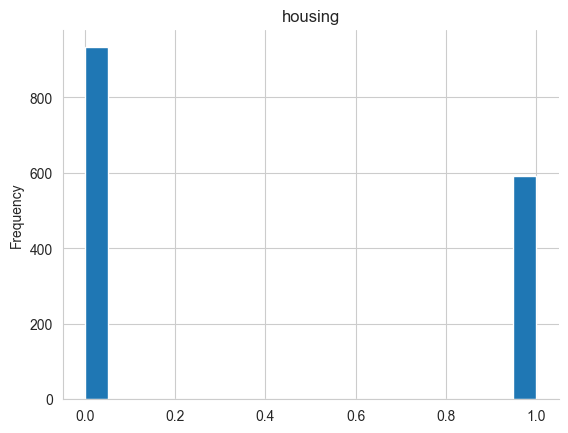

In [107]:
banking_data_2_2[["age", "default", "balance", "housing", "loan"]]["housing"].plot(
    kind="hist", bins=20, title="housing"
)


plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)

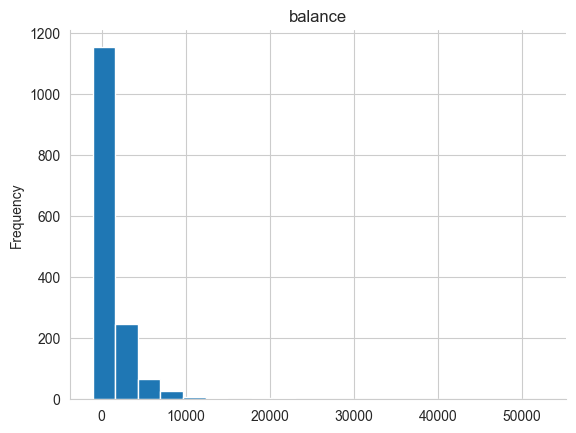

In [108]:
banking_data_2_2[["age", "default", "balance", "housing", "loan"]]["balance"].plot(
    kind="hist", bins=20, title="balance"
)


plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)

<Axes: xlabel='age', ylabel='deposit'>

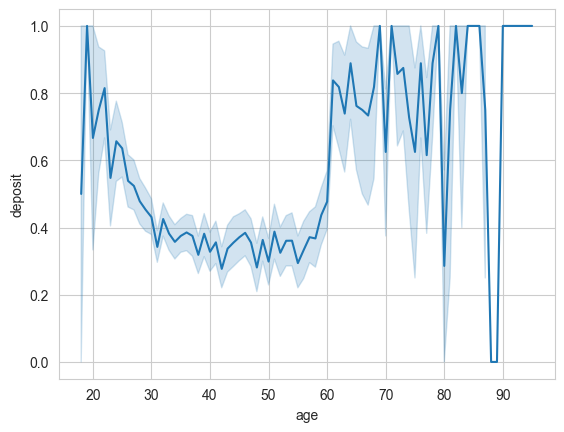

In [109]:
sns.lineplot(x="age", y="deposit", data=banking_data)

In [110]:
banking_data.to_csv("banking_data.csv")

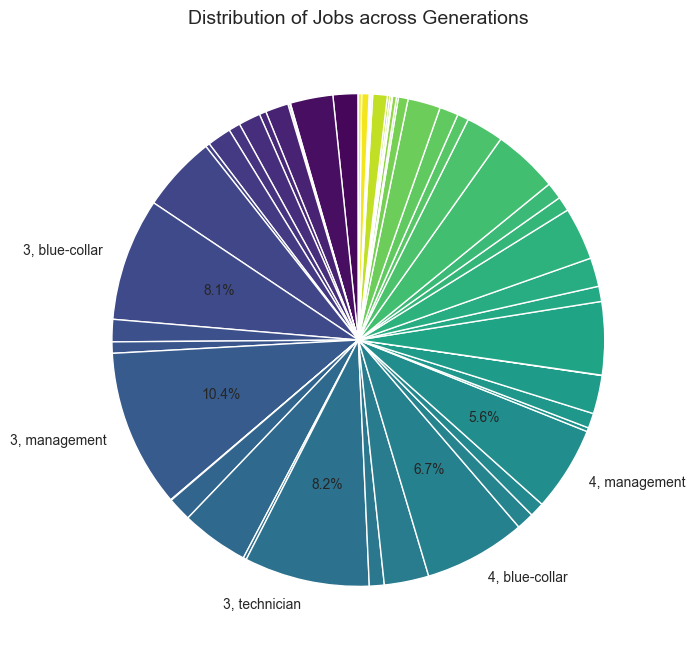

In [111]:
# 데이터 집계
grouped_data = (
    banking_data[banking_data["deposit"] == 0].groupby(["generation", "job"]).size()
)

# 원형 그래프에 표시할 라벨 준비
# labels = [f'{gen}, {job}' for gen, job in grouped_data.index]
# labels = [f'{gen}, {job}' if percent > 5.0 else '' for (gen, job), percent in zip(grouped_data.index, grouped_data)]

# 전체 합계에서 백분율 계산
total = grouped_data.sum()
grouped_percent = grouped_data / total * 100

# 라벨과 백분율 설정
labels = [
    f"{gen}, {job}" if percent > 5 else ""
    for (gen, job), percent in zip(grouped_data.index, grouped_percent)
]


# autopct를 위한 사용자 정의 함수
def custom_autopct(pct):
    return ("%1.1f%%" % pct) if pct > 5 else ""


colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

# 원형 그래프 그리기
plt.figure(figsize=(10, 8))
plt.pie(
    grouped_data, labels=labels, autopct=custom_autopct, startangle=90, colors=colors
)
plt.title("Distribution of Jobs across Generations", fontsize=14)
plt.show()

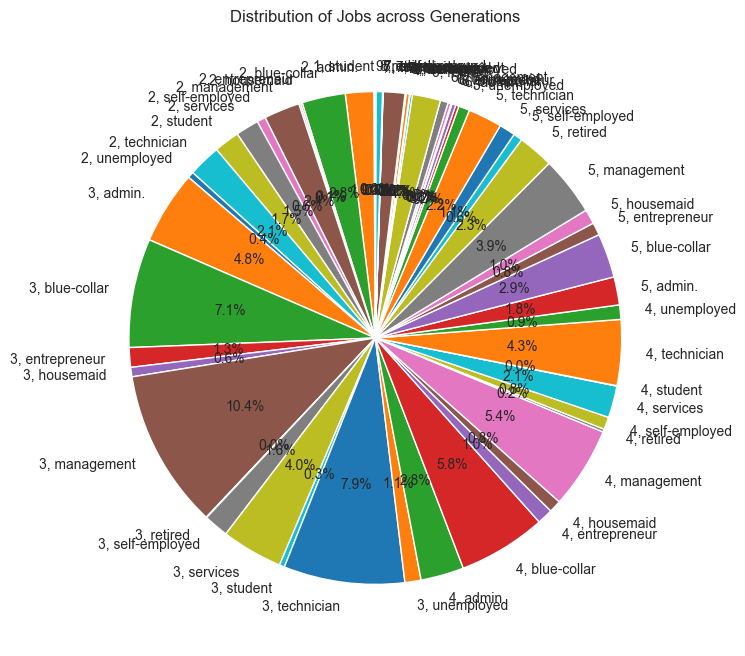

In [112]:
# 데이터 집계
grouped_data = banking_data.groupby(["generation", "job"]).size()

# 원형 그래프에 표시할 라벨 준비
labels = [f"{generation}, {job}" for generation, job in grouped_data.index]

# 원형 그래프 그리기
plt.figure(figsize=(10, 8))
plt.pie(grouped_data, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Jobs across Generations")
plt.show()

20대 이하 ~ 60대 이상 연령대의 고객은 적금 신청 관련 연락 없이 스스로 신청한 비율이 신청하지 않았을 때의 비율보다 컸다.

이에 대해서 연락이 있었을 때 해당 연령대의 적금 신청 비율이 더 늘어난다고 하면, 해당 연령대는 적금을 할 가능성이 높은 고객 집단이라고 볼 수 있다?


In [113]:
banking_data_3 = pd.read_csv("bank.csv")


banking_data_3.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [114]:
banking_data_3["generation"] = np.floor(banking_data_3["age"] / 10).astype(int)

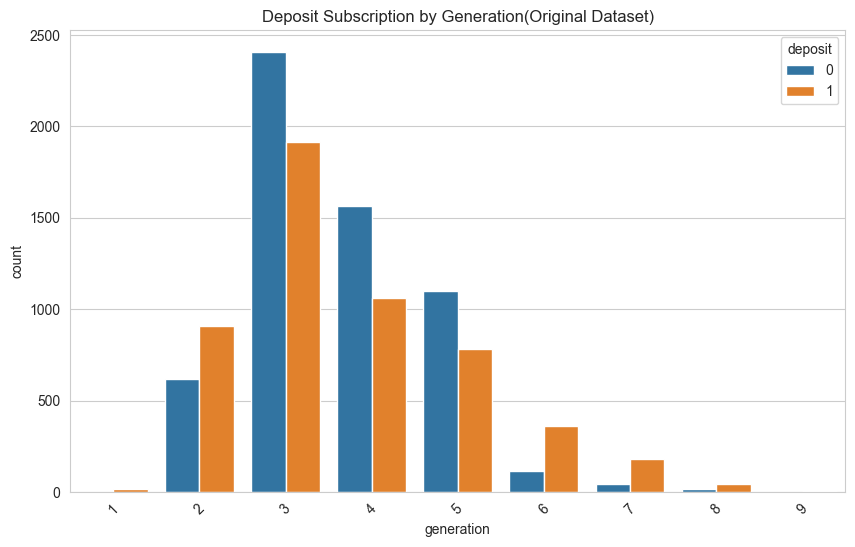

In [115]:
banking_data_3 = banking_data_3.replace("yes", 1)
banking_data_3 = banking_data_3.replace("no", 0)

plt.figure(figsize=(10, 6))
sns.countplot(x="generation", hue="deposit", data=banking_data_3)
plt.title("Deposit Subscription by Generation(Original Dataset)")
plt.xticks(rotation=45)
plt.show()

In [116]:
mask_1 = banking_data_3["age"] > 29
mask_2 = banking_data_3["age"] < 60
mask_3 = banking_data_3["age"] < 30
mask_4 = banking_data_3["age"] > 59

banking_data_3_1 = banking_data_3[mask_1 & mask_2]
banking_data_3_2 = banking_data_3[mask_3 | mask_4]
banking_data_3_1.head()
banking_data_3_2.head()

age          job   marital  education  default  balance  housing  loan  \
7    60      retired  divorced  secondary        0      545        1     0   
9    28     services    single  secondary        0     5090        1     0   
12   29   management   married   tertiary        0      199        1     1   
20   28       admin.  divorced  secondary        0      785        1     0   
29   28  blue-collar    single  secondary        0      759        1     0   

    contact  day month  duration  campaign  pdays  previous poutcome  deposit  \
7   unknown    6   may      1030         1     -1         0  unknown        1   
9   unknown    6   may      1297         3     -1         0  unknown        1   
12  unknown    7   may      1689         4     -1         0  unknown        1   
20  unknown    8   may       442         2     -1         0  unknown        1   
29  unknown    9   may       710         1     -1         0  unknown        1   

    generation  
7            6  
9            2  
12           2  
20           2  
29           2

In [117]:
banking_data_3_1[banking_data_3_1["pdays"] != -1]["deposit"].value_counts()

deposit
1    1338
0     789
Name: count, dtype: int64

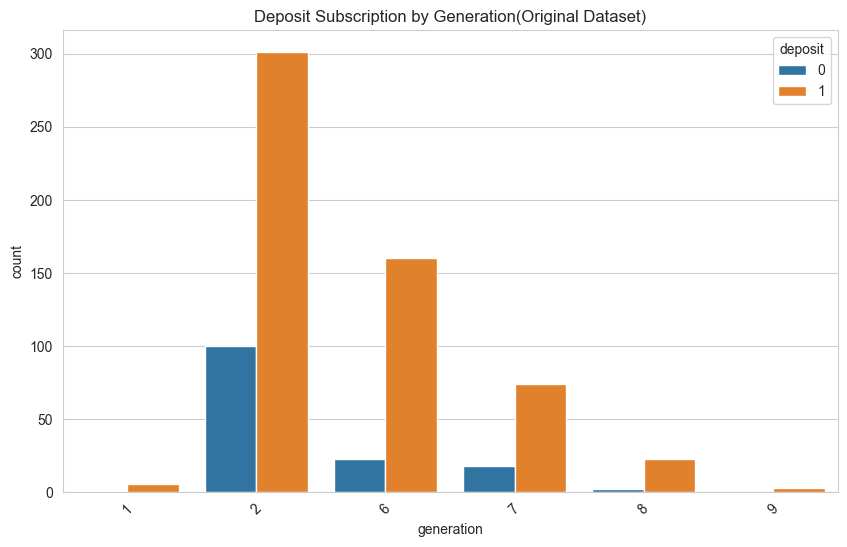

In [118]:
banking_data_3_2[banking_data_3_2["pdays"] != -1]["deposit"].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(
    x="generation",
    hue="deposit",
    data=banking_data_3_2[banking_data_3_2["pdays"] != -1],
)
plt.title("Deposit Subscription by Generation(Original Dataset)")
plt.xticks(rotation=45)
plt.show()

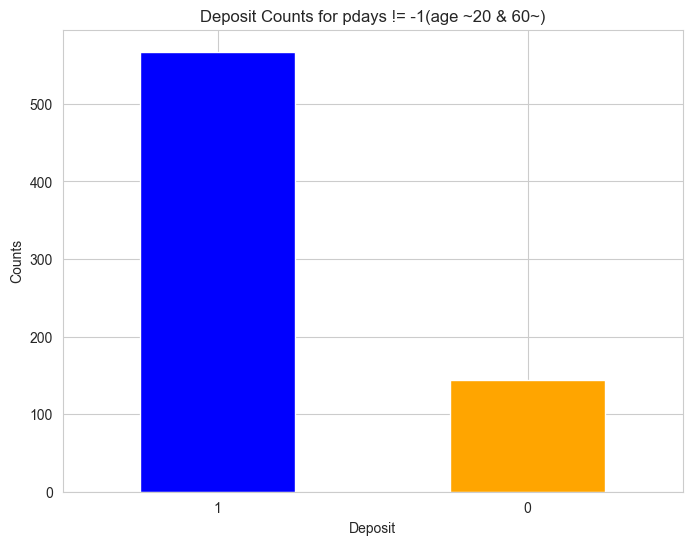

In [119]:
deposit_counts = banking_data_3_2[banking_data_3_2["pdays"] != -1][
    "deposit"
].value_counts()


# 막대 그래프로 결과를 표시
plt.figure(figsize=(8, 6))  # 그래프의 크기를 설정
deposit_counts.plot(kind="bar", color=["blue", "orange"])  # 막대 그래프를 그림
plt.title("Deposit Counts for pdays != -1(age ~20 & 60~)")  # 그래프 제목
plt.xlabel("Deposit")  # x축 라벨
plt.ylabel("Counts")  # y축 라벨
plt.xticks(rotation=0)  # x축 라벨의 회전을 설정


plt.show()

In [120]:
banking_data_3_2[banking_data_3_2["pdays"] != -1]["deposit"].value_counts()

deposit
1    567
0    144
Name: count, dtype: int64

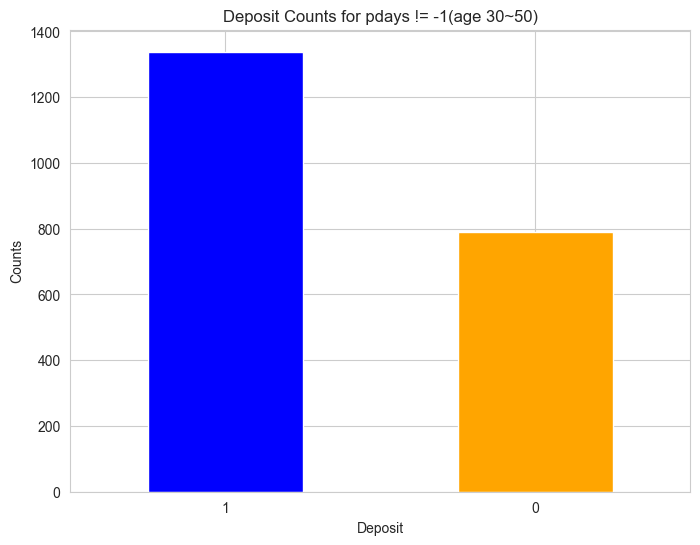

In [121]:
deposit_counts = banking_data_3_1[banking_data_3_1["pdays"] != -1][
    "deposit"
].value_counts()


# 막대 그래프로 결과를 표시

plt.figure(figsize=(8, 6))  # 그래프의 크기를 설정
deposit_counts.plot(kind="bar", color=["blue", "orange"])  # 막대 그래프를 그림
plt.title("Deposit Counts for pdays != -1(age 30~50)")  # 그래프 제목
plt.xlabel("Deposit")  # x축 라벨
plt.ylabel("Counts")  # y축 라벨
plt.xticks(rotation=0)  # x축 라벨의 회전을 설정
plt.show()

In [122]:
banking_data_3_1[banking_data_3_1["pdays"] != -1]["deposit"].value_counts()

deposit
1    1338
0     789
Name: count, dtype: int64

In [123]:
banking_data = pd.read_csv("bank.csv")

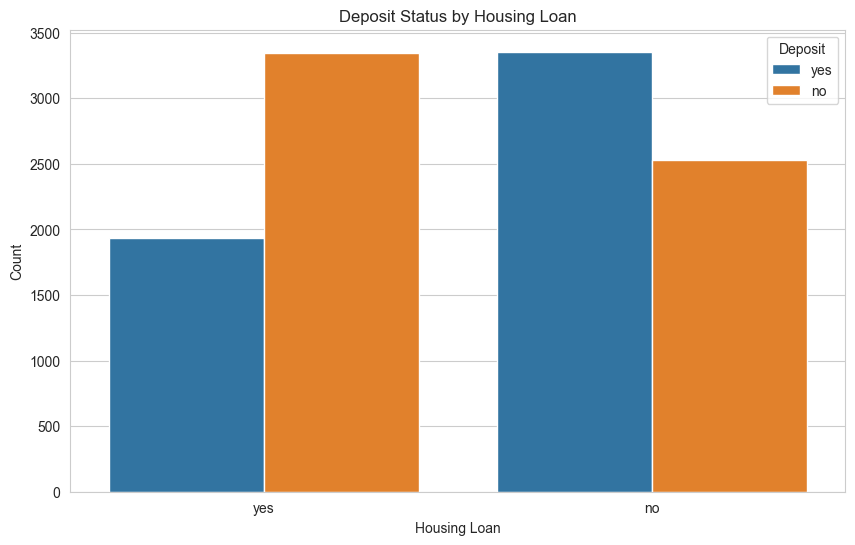

In [124]:
plt.figure(figsize=(10, 6))
sns.countplot(x="housing", hue="deposit", data=banking_data)
plt.title("Deposit Status by Housing Loan")
plt.xlabel("Housing Loan")
plt.ylabel("Count")
plt.legend(title="Deposit")
plt.show()

In [125]:
contingency_table = pd.crosstab(banking_data["housing"], banking_data["deposit"])



chi2, p_value, _, _ = chi2_contingency(contingency_table)



chi2, p_value

(463.1892407533161, 9.724394114495535e-103)

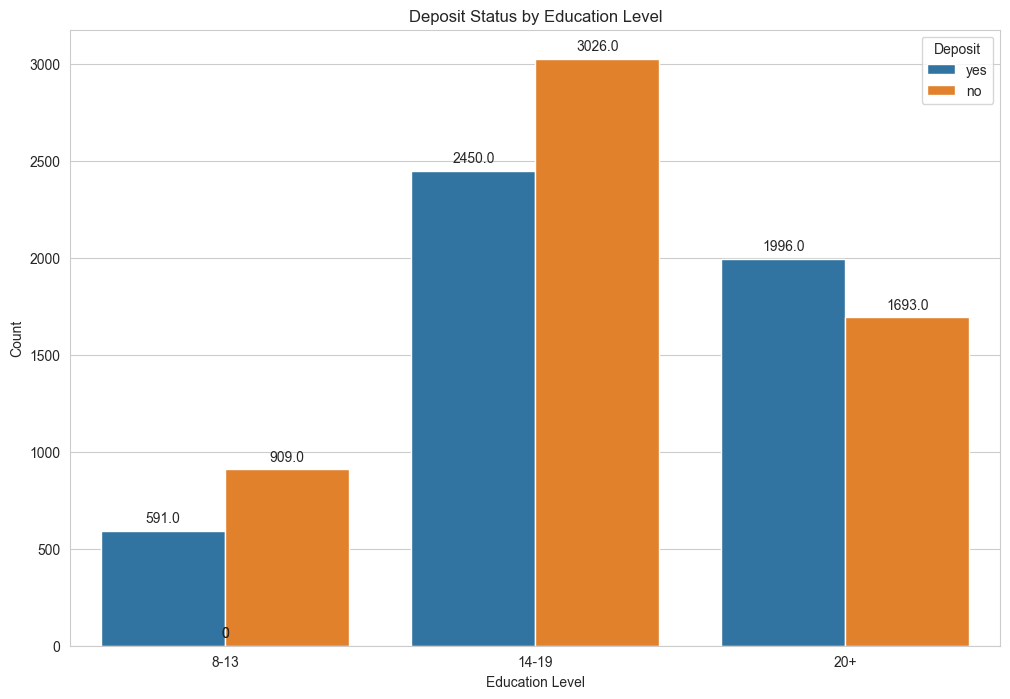

In [126]:
education_mapping = {"primary": "8-13", "secondary": "14-19", "tertiary": "20+"}



banking_data["education"] = banking_data["education"].map(education_mapping)



plt.figure(figsize=(12, 8))
bar_plot = sns.countplot(

    x="education", hue="deposit", data=banking_data, order=["8-13", "14-19", "20+"]
)



plt.title("Deposit Status by Education Level")



plt.xlabel("Education Level")



plt.ylabel("Count")



plt.legend(title="Deposit")



for p in bar_plot.patches:
    bar_plot.annotate(

        format(p.get_height()),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",

        va="center",

        xytext=(0, 9),
        textcoords="offset points",
    )



plt.show()

In [127]:
education_contingency_table = pd.crosstab(
    banking_data["education"], banking_data["deposit"]
)


edu_chi2, edu_p_value, _, _ = chi2_contingency(education_contingency_table)

edu_chi2, edu_p_value

(120.51037605461586, 6.784288903074311e-27)

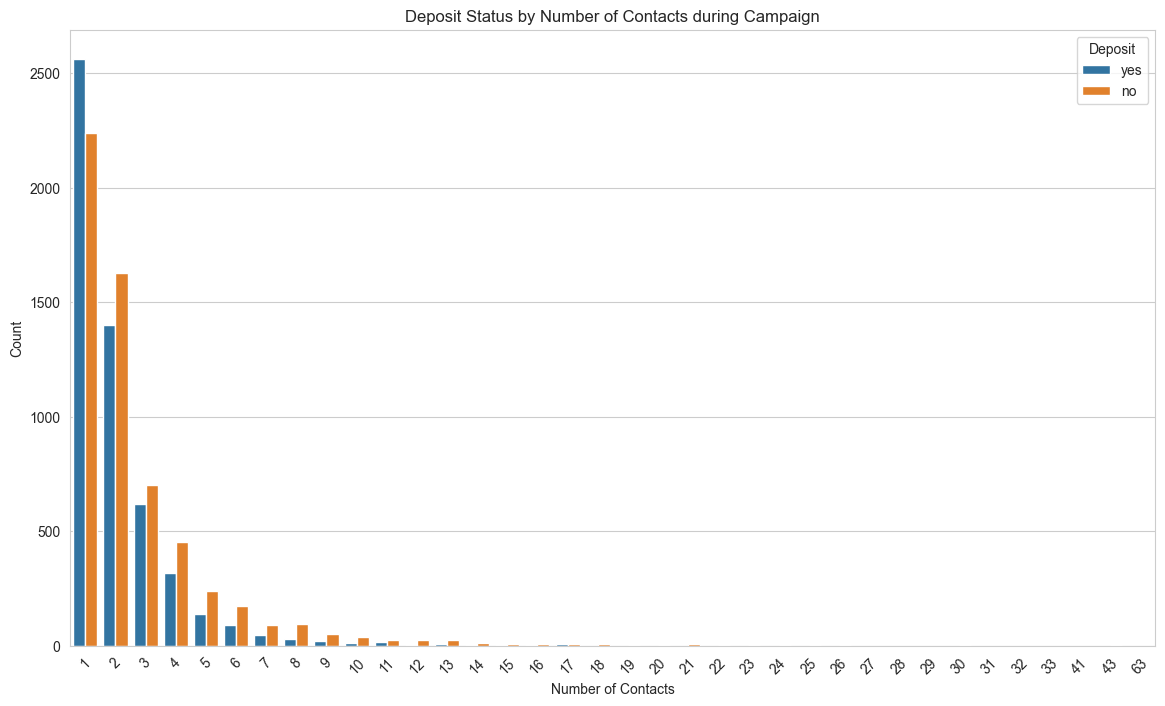

In [128]:
plt.figure(figsize=(14, 8))
sns.countplot(x="campaign", hue="deposit", data=banking_data)
plt.title("Deposit Status by Number of Contacts during Campaign")
plt.xlabel("Number of Contacts")
plt.ylabel("Count")
plt.legend(title="Deposit")
plt.xticks(rotation=45)
plt.show()

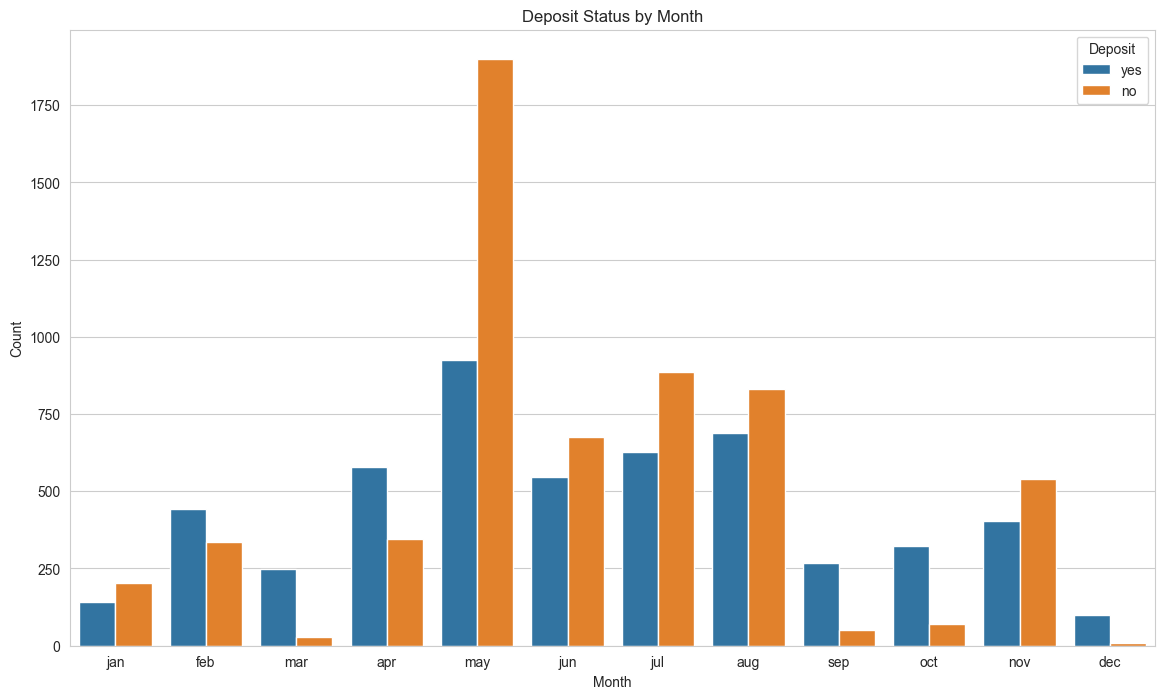

In [129]:
plt.figure(figsize=(14, 8))
month_order = [
    "jan",
    "feb",
    "mar",
    "apr",
    "may",
    "jun",
    "jul",
    "aug",
    "sep",
    "oct",
    "nov",
    "dec",
]
sns.countplot(x="month", hue="deposit", data=banking_data, order=month_order)
plt.title("Deposit Status by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Deposit")
plt.show()

In [130]:
# Creating a contingency table for 'month' and 'deposit'
month_contingency_table = pd.crosstab(
    banking_data_3_1["month"], banking_data_3_1["deposit"]
)

# Performing Chi-squared test on month vs deposit
month_chi2, month_p_value, _, _ = chi2_contingency(month_contingency_table)

month_chi2, month_p_value

(794.0024223840484, 3.674593957112425e-163)

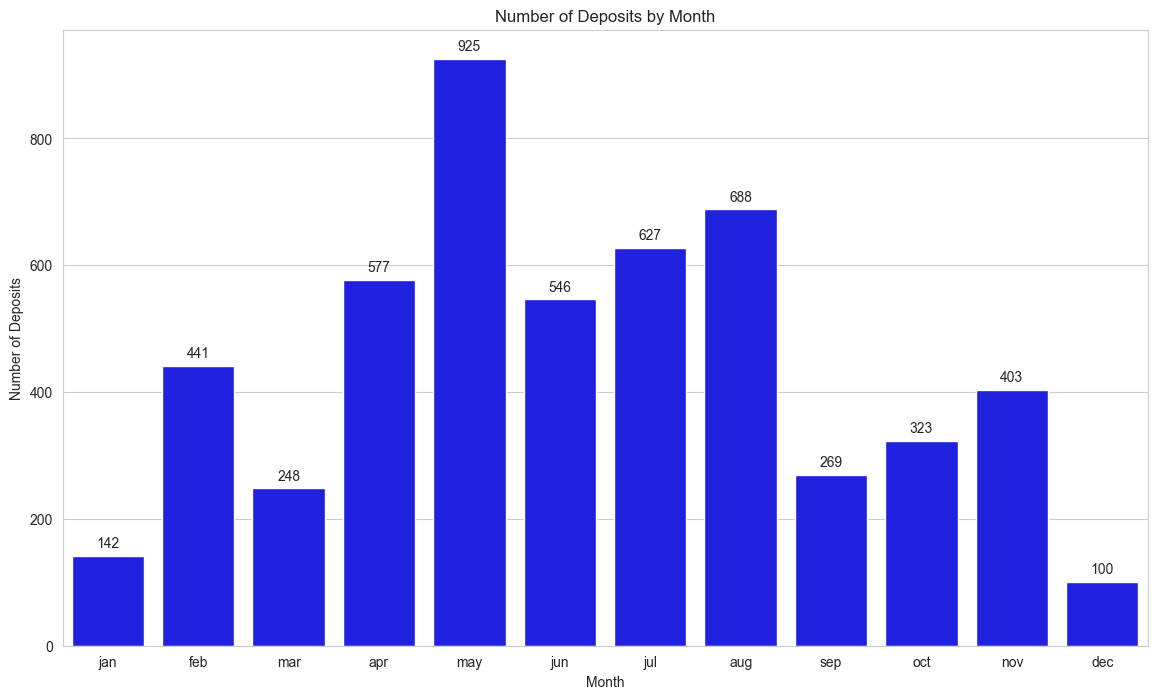

In [131]:
deposit_yes_data = banking_data[banking_data["deposit"] == "yes"]

plt.figure(figsize=(14, 8))
bar_plot = sns.countplot(
    x="month", data=deposit_yes_data, order=month_order, color="blue"
)
plt.title("Number of Deposits by Month")
plt.xlabel("Month")
plt.ylabel("Number of Deposits")

for p in bar_plot.patches:
    bar_plot.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )
plt.show()

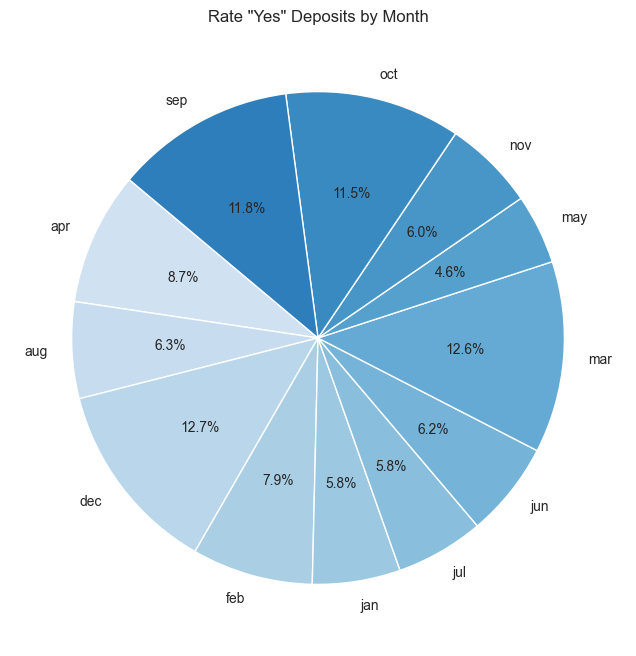

In [132]:
yes_deposits = banking_data[banking_data["deposit"] == "yes"]

monthly_yes_counts = yes_deposits["month"].value_counts()

total_monthly_counts = banking_data["month"].value_counts()

yes_percentages = (monthly_yes_counts / total_monthly_counts) * 100

colors = plt.get_cmap("Blues")(np.linspace(0.2, 0.7, len(yes_percentages.index)))
plt.figure(figsize=(10, 8))
plt.pie(
    yes_percentages,
    labels=yes_percentages.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
)
plt.title('Rate "Yes" Deposits by Month')
plt.show()

In [133]:
banking_data["month"].value_counts()

month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64

# 4. Modeling


## Read Data


In [134]:
banking_data = pd.read_csv("bank.csv")
banking_data.head(10)

age         job   marital  education default  balance housing loan  \
0   59      admin.   married  secondary      no     2343     yes   no   
1   56      admin.   married  secondary      no       45      no   no   
2   41  technician   married  secondary      no     1270     yes   no   
3   55    services   married  secondary      no     2476     yes   no   
4   54      admin.   married   tertiary      no      184      no   no   
5   42  management    single   tertiary      no        0     yes  yes   
6   56  management   married   tertiary      no      830     yes  yes   
7   60     retired  divorced  secondary      no      545     yes   no   
8   37  technician   married  secondary      no        1     yes   no   
9   28    services    single  secondary      no     5090     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may      1042         1     -1         0  unknown     yes  
1  unknown    5   may      1467         1     -1         0  unknown     yes  
2  unknown    5   may      1389         1     -1         0  unknown     yes  
3  unknown    5   may       579         1     -1         0  unknown     yes  
4  unknown    5   may       673         2     -1         0  unknown     yes  
5  unknown    5   may       562         2     -1         0  unknown     yes  
6  unknown    6   may      1201         1     -1         0  unknown     yes  
7  unknown    6   may      1030         1     -1         0  unknown     yes  
8  unknown    6   may       608         1     -1         0  unknown     yes  
9  unknown    6   may      1297         3     -1         0  unknown     yes

In [135]:
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Check Missing Value


<Axes: >

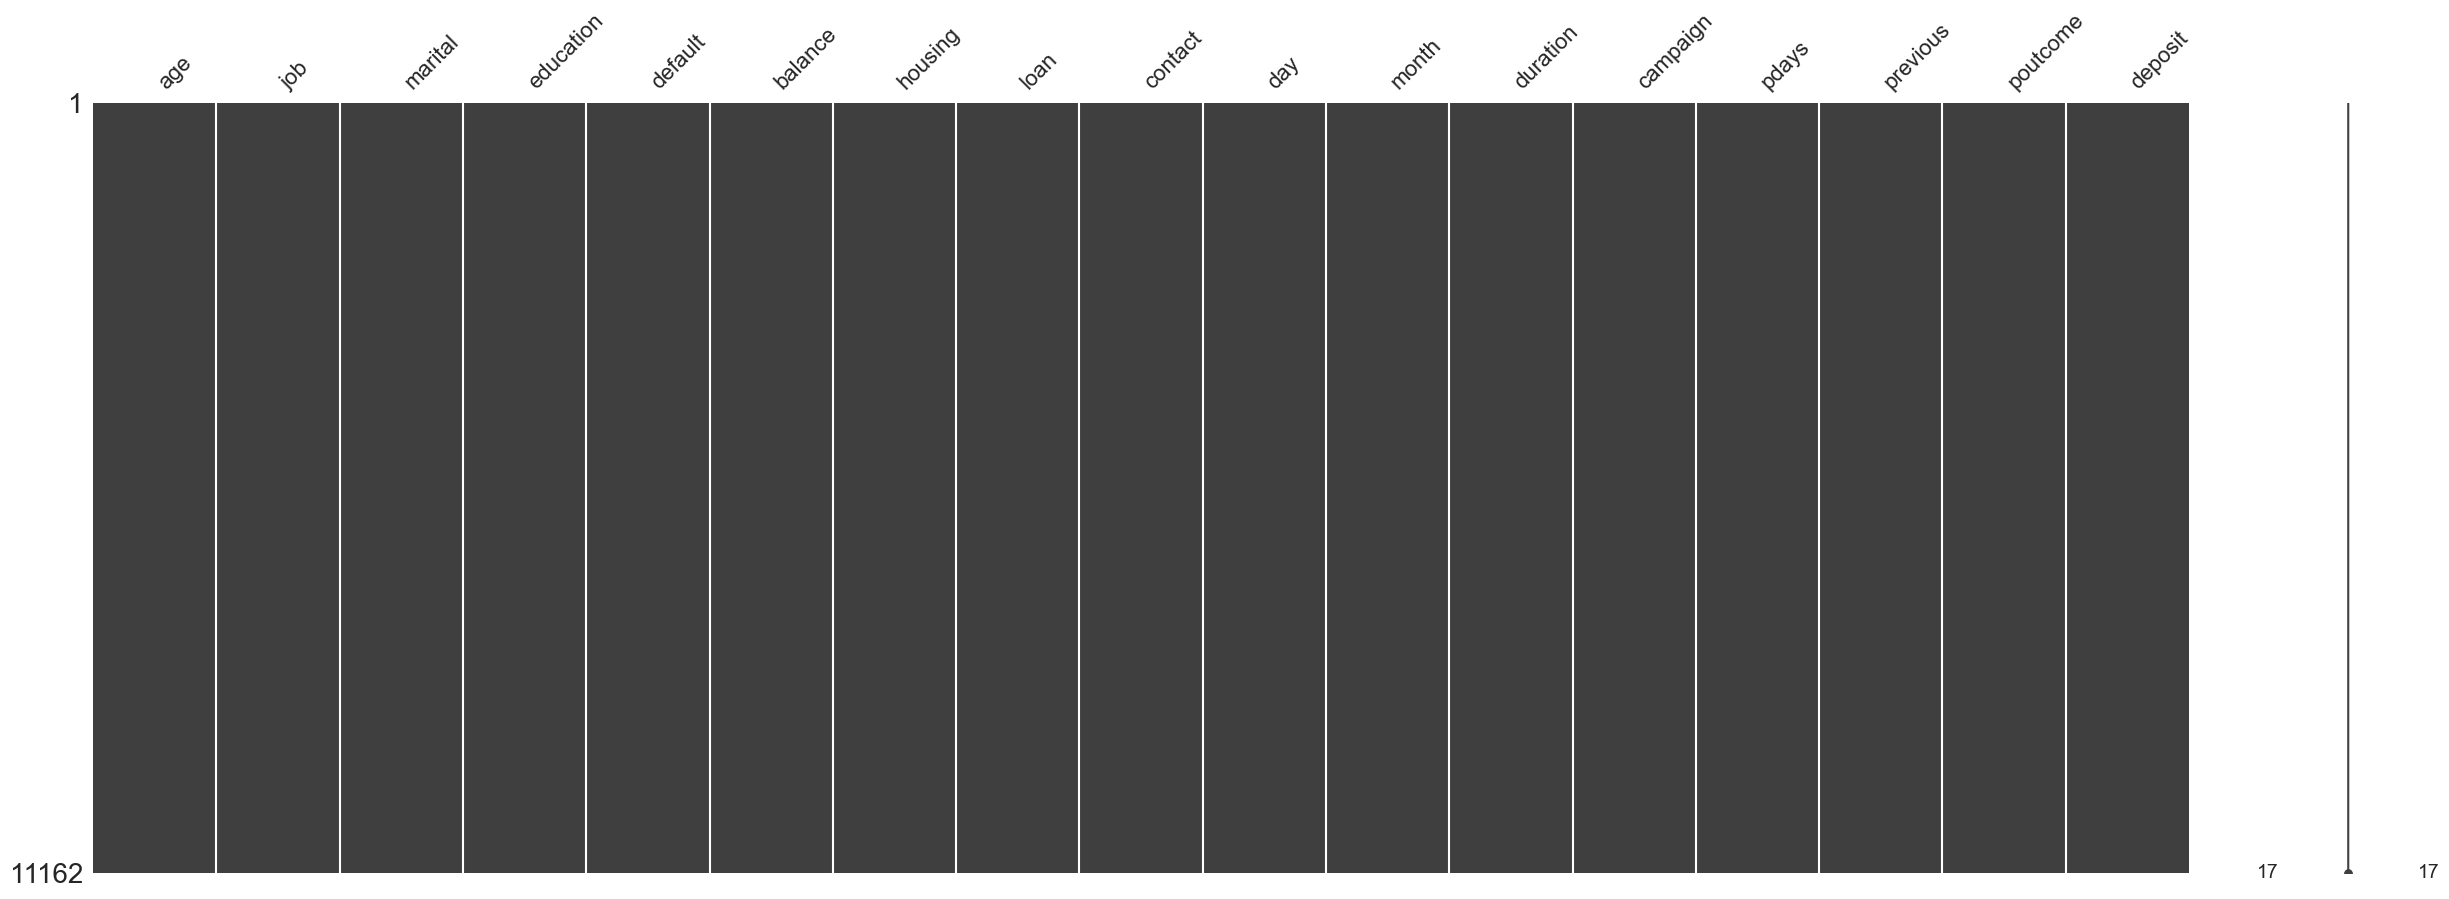

In [136]:
missingno.matrix(banking_data, figsize=(30, 10))

### Check Cardinality


In [137]:
banking_data[banking_data.duplicated() == True]
print(banking_data.duplicated().sum())

0


### Data Copy


In [138]:
banking_data_cp = banking_data.copy()

## Encoding Categorical Variables


In [139]:
num_string_columns = banking_data_cp.select_dtypes(include="object").shape[1]
print("문자열 열의 총 개수:", num_string_columns)

문자열 열의 총 개수: 10


In [140]:
banking_data_cp.select_dtypes(include="object").columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

**원-핫 인코딩(one-hot encoder)**: **`job`**, **`education`**, **`contact`**, **`month`**

**레이블 인코딩(label encoder)**: **`marital`**, **`default`**, **`housing`**, **`loan`**, **`poutcome`**


### LabelEncoder


In [141]:
label_cols = ["marital", "default", "housing", "loan", "poutcome"]
label_encoder = LabelEncoder()
for col in label_cols:
    banking_data_cp[col] = label_encoder.fit_transform(banking_data[col])
banking_data_cp["deposit"] = banking_data_cp["deposit"].apply(
    lambda x: 1 if x == "yes" else 0
)

### One-HotEncoder


In [142]:
one_hot_cols = ["job", "education", "contact", "month"]
banking_data_cp = pd.get_dummies(
    banking_data_cp, columns=one_hot_cols, dtype=int)

banking_data_cp.head()

age  marital  default  balance  housing  loan  day  duration  campaign  \
0   59        1        0     2343        1     0    5      1042         1   
1   56        1        0       45        0     0    5      1467         1   
2   41        1        0     1270        1     0    5      1389         1   
3   55        1        0     2476        1     0    5       579         1   
4   54        1        0      184        0     0    5       673         2   

   pdays  ...  month_dec  month_feb  month_jan  month_jul  month_jun  \
0     -1  ...          0          0          0          0          0   
1     -1  ...          0          0          0          0          0   
2     -1  ...          0          0          0          0          0   
3     -1  ...          0          0          0          0          0   
4     -1  ...          0          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  
0          0          1          0          0          0  
1          0          1          0          0          0  
2          0          1          0          0          0  
3          0          1          0          0          0  
4          0          1          0          0          0  

[5 rows x 44 columns]

In [143]:
num_string_columns = banking_data_cp.select_dtypes(include="object").shape[1]
print("문자열 열의 총 개수:", num_string_columns)

문자열 열의 총 개수: 0


## Split data


In [144]:
# 데이터 분할 및 스케일링
X = banking_data_cp.drop("deposit", axis=1)
y = banking_data_cp["deposit"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## Data Scaling


In [145]:
# scaler = MinMaxScaler()
# scaled_train = scaler.fit_transform(X_train)
# scaled_test = scaler.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling


In [146]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42, verbose=-1),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
}

In [147]:
feature_importances = pd.DataFrame(index=X_train.columns)
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy ({name}): {accuracy:.4f}")

Accuracy (Decision Tree): 0.7793
Accuracy (Logistic Regression): 0.8191
Accuracy (Random Forest): 0.8552
Accuracy (Gradient Boosting): 0.8468
Accuracy (SVM): 0.8456
Accuracy (KNN): 0.7689
Accuracy (XGBoost): 0.8567
Accuracy (LightGBM): 0.8659
Accuracy (CatBoost): 0.8647


## Imbalanced Data


In [148]:
# y_train을 데이터프레임으로 변환하여 클래스 불균형 확인
df_train = pd.DataFrame({"y": y_train})

# 각 클래스의 샘플 수 계산
class_counts = df_train["y"].value_counts()

print("Class Counts:")
print(class_counts)

Class Counts:
y
0    4111
1    3702
Name: count, dtype: int64


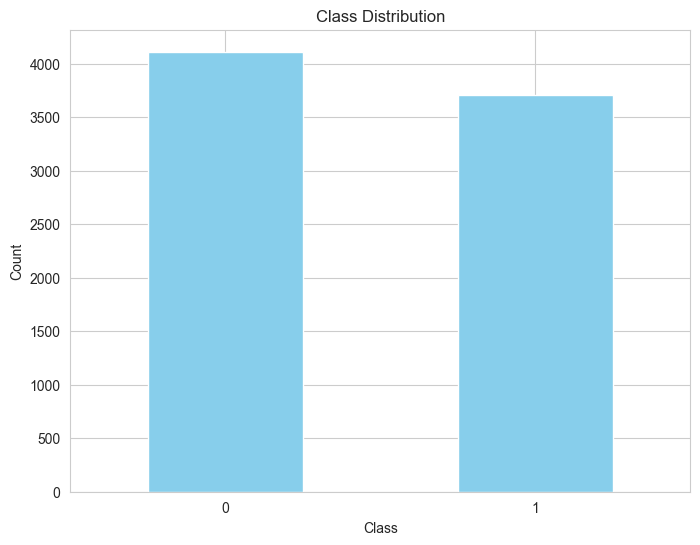

In [149]:
plt.figure(figsize=(8, 6))
class_counts.plot(kind="bar", color="skyblue")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

### Over Sampling


In [150]:
smote = SMOTE(random_state=42)
X_train_resampled_ov, y_train_resampled_ov = smote.fit_resample(
    X_train_scaled, y_train)

# 샘플 수 확인
print("Shape of X_train_resampled:", X_train_resampled_ov.shape)
print("Shape of y_train_resampled:", y_train_resampled_ov.shape)

Shape of X_train_resampled: (8222, 43)
Shape of y_train_resampled: (8222,)


#### Modeling


In [151]:
# 모델 학습 및 정확도 출력
for name, model in models.items():
    model.fit(X_train_resampled_ov, y_train_resampled_ov)
    y_pred = model.predict(X_test_scaled)
    over_accuracy = accuracy_score(y_test, y_pred)
    print(f"Over Sampling Accuracy ({name}): {over_accuracy:.4f}")

Over Sampling Accuracy (Decision Tree): 0.7907
Over Sampling Accuracy (Logistic Regression): 0.8220
Over Sampling Accuracy (Random Forest): 0.8588
Over Sampling Accuracy (Gradient Boosting): 0.8513


Over Sampling Accuracy (SVM): 0.8444
Over Sampling Accuracy (KNN): 0.7713
Over Sampling Accuracy (XGBoost): 0.8582
Over Sampling Accuracy (LightGBM): 0.8650
Over Sampling Accuracy (CatBoost): 0.8650


### Under Sampling


In [152]:
rus = RandomUnderSampler(random_state=42)
X_train_resampled_un, y_train_resampled_un = rus.fit_resample(
    X_train_scaled, y_train)

# 샘플 수 확인
print("Shape of X_train_resampled:", X_train_resampled_un.shape)
print("Shape of y_train_resampled:", y_train_resampled_un.shape)

Shape of X_train_resampled: (7404, 43)
Shape of y_train_resampled: (7404,)


#### Modeling


In [153]:
for name, model in models.items():
    model.fit(X_train_resampled_un, y_train_resampled_un)
    y_pred = model.predict(X_test_scaled)
    under_accuracy = accuracy_score(y_test, y_pred)
    print(f"Under Sampling Accuracy ({name}): {under_accuracy:.4f}")

Under Sampling Accuracy (Decision Tree): 0.7946
Under Sampling Accuracy (Logistic Regression): 0.8205


Under Sampling Accuracy (Random Forest): 0.8582
Under Sampling Accuracy (Gradient Boosting): 0.8498
Under Sampling Accuracy (SVM): 0.8444
Under Sampling Accuracy (KNN): 0.7704
Under Sampling Accuracy (XGBoost): 0.8531
Under Sampling Accuracy (LightGBM): 0.8617
Under Sampling Accuracy (CatBoost): 0.8674


**Under-sampling은 소수 클래스의 데이터를 제거하여 데이터 불균형을 해결하여 좀더 좋은 정확도를 보이지만, 데이터 손실 문제가 발생할 수 있다. 이는 모델이 소수 클래스의 중요한 패턴을 놓칠 수 있고, 전체 데이터셋의 특성을 충분히 학습하지 못할 수 있음을 의미한다.**

**이러한 이유로, under-sampling을 선택하지 않았으며, 다른 샘플링 기법을 고려할 필요가 있다.**


## Model Selection


### Comparing f1 score, recall and precision


##### No Sampling


In [154]:
lgbboost_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
lgbboost_model.fit(X_train_scaled, y_train)

# 훈련 데이터에서의 성능
pred_train_lgbboost = lgbboost_model.predict(X_train_scaled)
accuracy_train_lgbboost = accuracy_score(y_train, pred_train_lgbboost)
print("Training Accuracy (LGBBoost):", accuracy_train_lgbboost)

# 테스트 데이터에서의 성능
pred_lgbboost = lgbboost_model.predict(X_test_scaled)
accuracy_lgbboost = accuracy_score(y_test, pred_lgbboost)
print("Testing Accuracy (LGBBoost):", accuracy_lgbboost)
print(classification_report(y_test, pred_lgbboost))

Training Accuracy (LGBBoost): 0.9171892998848074
Testing Accuracy (LGBBoost): 0.8659301283965363
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1762
           1       0.84      0.88      0.86      1587

    accuracy                           0.87      3349
   macro avg       0.87      0.87      0.87      3349
weighted avg       0.87      0.87      0.87      3349



---


**LGBMBoost**

- 훈련 정확도: 0.917
- 테스트 정확도: 0.866
- 정밀도: 0.89 (클래스 0), 0.84 (클래스 1)
- 재현율: 0.85 (클래스 0), 0.88 (클래스 1)
- F1 점수: 0.87 (클래스 0), 0.86 (클래스 1)


---


##### Over Sampling


In [155]:
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train_resampled_ov, y_train_resampled_ov)

# 훈련 데이터에서의 성능
pred_train_catboost_resampled = catboost_model.predict(X_train_resampled_ov)
accuracy_train_catboost_resampled = accuracy_score(
    y_train_resampled_ov, pred_train_catboost_resampled
)
print(
    "Training Accuracy with Oversampling (CatBoost):", accuracy_train_catboost_resampled
)

# 테스트 데이터에서의 성능
pred_catboost_resampled = catboost_model.predict(X_test_scaled)
accuracy_catboost_resampled = accuracy_score(y_test, pred_catboost_resampled)
print("Testing Accuracy with Oversampling (CatBoost):", accuracy_catboost_resampled)
print(classification_report(y_test, pred_catboost_resampled))

Training Accuracy with Oversampling (CatBoost): 0.9210654342009243
Testing Accuracy with Oversampling (CatBoost): 0.8650343386085398
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1762
           1       0.84      0.89      0.86      1587

    accuracy                           0.87      3349
   macro avg       0.87      0.87      0.86      3349
weighted avg       0.87      0.87      0.87      3349



---


**오버샘플링을 사용한 CatBoost**

- 훈련 정확도: 0.921
- 테스트 정확도: 0.865
- 정밀도: 0.89 (클래스 0), 0.84 (클래스 1)
- 재현율: 0.84 (클래스 0), 0.89 (클래스 1)
- F1 점수: 0.87 (클래스 0), 0.86 (클래스 1)


---


##### 결과 분석


**정확도(Accuracy)**

- LGBBoost의 훈련 정확도는 91.72%, 테스트 정확도는 86.59%.
- CatBoost의 훈련 정확도는 92.11%, 테스트 정확도는 86.50%.
- 두 모델 모두 테스트 정확도는 매우 비슷하나, 오버샘플링을 사용한 CatBoost 모델이 LGBMBoost 모델보다 약간 높은 훈련 정확도를 보이지만, 테스트 정확도에서는 LGBMBoost가 약간 더 높다.

**정밀도(Precision)**

- 두 클래스(0과 1)에 대한 정밀도는 두 모델이 매우 비슷하다. 클래스 1에 대한 정밀도에서 LGBBoost가 CatBoost보다 약간 높다.

**재현율(Recall)**

- 클래스 0에 대한 재현율은 LGBBoost가 더 높으나, 클래스 1에 대한 재현율은 CatBoost가 더 높다. 이는 LGBBoost가 클래스 0의 예측에 더 강점을 보이고, CatBoost는 클래스 1의 예측에 더 강점을 보인다는 것을 의미한다.

**F1-Score**

- 두 모델의 F1-Score는 매우 비슷하다. 이는 두 모델이 균형잡힌 성능을 보인다는 것을 의미한다.


---


### OverFitting


In [156]:
# LightGBM 모델의 훈련 정확도와 검증 정확도의 차이 출력
print(
    "Difference of Train Accuracy and Test Accuracy - LightGBM: {:.3f}".format(
        accuracy_train_lgbboost - accuracy_lgbboost
    )
)

# CatBoost 모델의 훈련 정확도와 검증 정확도의 차이 출력
print(
    "Difference of Train Accuracy and Test Accuracy - CatBoost: {:.3f}".format(
        accuracy_train_catboost_resampled - accuracy_catboost_resampled
    )
)

Difference of Train Accuracy and Test Accuracy - LightGBM: 0.051
Difference of Train Accuracy and Test Accuracy - CatBoost: 0.056


---


##### 결과분석


**과적합(Overfitting)** 은 모델이 훈련 데이터에 지나치게 최적화되어 새로운 데이터에 대해 일반화 성능이 떨어지는 현상을 말한다.

과적합의 정도를 파악하기 위해서는 훈련 데이터와 테스트 데이터에 대한 모델의 성능 차이를 비교하는 것이 일반적이다.
큰 성능 차이는 과적합을 나타낼 수 있다.

**LightGBM**

- 훈련 정확도: 0.9172
- 테스트 정확도: 0.8659
- 정확도 차이: 0.9172 - 0.8659 = 0.0513

**CatBoost (오버 샘플링)**

- 훈련 정확도: 0.9211
- 테스트 정확도: 0.8650
- 정확도 차이: 0.9211 - 0.8650 = 0.0561

과적합 정도를 비교했을 때, **CatBoost (오버 샘플링)** 모델이 **LightGBM** 약간 더 큰 차이를 보이고 있다. 하지만, 두 모델의 과적합 차이는 크지 않고 두 모델 모두 과적합(overfitting)의 징후는 보이지 않으며, 테스트 데이터에 대한 성능이 꽤 좋습니다. 다만, CatBoost가 약간 더 훈련 데이터에 대해 높은 정확도를 보이는 것으로 나타나, 특정 상황에서는 CatBoost가 더 선호될 수 있다.


---


### Cross Validation


In [157]:
# LightGBM 모델에 대한 교차 검증 점수 계산
cv_scores_lgbboost = cross_val_score(
    lgbboost_model, X_train_scaled, y_train, cv=5, scoring="accuracy"
)

# CatBoost 모델에 대한 교차 검증 점수 계산
cv_scores_catboost = cross_val_score(
    catboost_model, X_train_resampled_ov, y_train_resampled_ov, cv=5, scoring="accuracy"
)

# LightGBM 모델(오버샘플링 적용)에 대한 교차 검증 점수 계산
cv_scores_lgbboost_ov = cross_val_score(
    lgbboost_model, X_train_resampled_ov, y_train_resampled_ov, cv=5, scoring="accuracy"
)

# 교차 검증 점수 출력
print("Cross-validation scores for LightGBM:", cv_scores_lgbboost)
print("Cross-validation scores for CatBoost with oversampling:", cv_scores_catboost)
print("Cross-validation scores for LightGBM with oversampling:", cv_scores_lgbboost_ov)

# 각 모델의 평균 정확도 출력
print("Average accuracy for LightGBM:", cv_scores_lgbboost.mean())
print("Average accuracy for CatBoost with oversampling:", cv_scores_catboost.mean())
print("Average accuracy for LightGBM with oversampling:",
      cv_scores_lgbboost_ov.mean())

Cross-validation scores for LightGBM: [0.86948177 0.84516955 0.86052463 0.86107554 0.84891165]
Cross-validation scores for CatBoost with oversampling: [0.88085106 0.85653495 0.87104623 0.86253041 0.88564477]
Cross-validation scores for LightGBM with oversampling: [0.87173252 0.85835866 0.86253041 0.85583942 0.8783455 ]
Average accuracy for LightGBM: 0.857032627920141
Average accuracy for CatBoost with oversampling: 0.8713214858858593
Average accuracy for LightGBM with oversampling: 0.8653613027754975


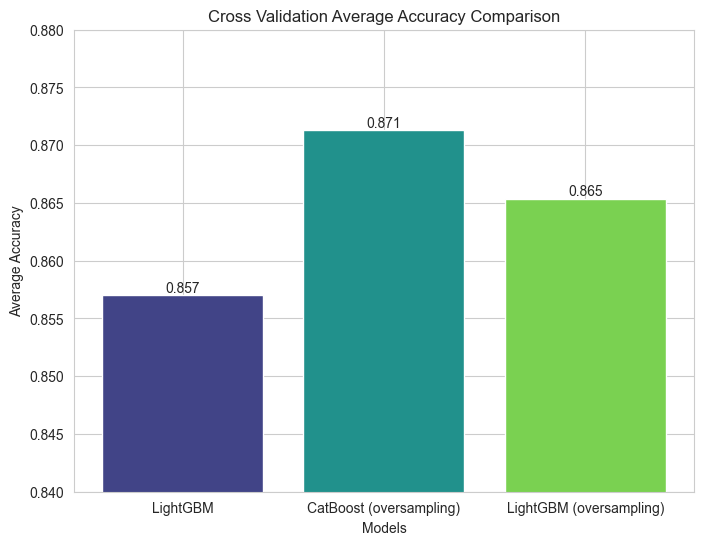

In [168]:
# 데이터 입력
models = ["LightGBM", "CatBoost (oversampling)", "LightGBM (oversampling)"]
accuracies = [
    cv_scores_lgbboost.mean(),
    cv_scores_catboost.mean(),
    cv_scores_lgbboost_ov.mean(),
]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=plt.cm.viridis([0.2, 0.5, 0.8]))

# 비율 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, yval, f"{yval:.3f}", ha="center", va="bottom"
    )

# 제목 및 라벨 설정
plt.title("Cross Validation Average Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Average Accuracy")
plt.ylim(0.84, 0.88)  # y축 범위 설정

# 그래프 표시
plt.show()

---


##### 결과분석


- **LightGBM**: 0.8570
- **오버샘플링을 사용한 CatBoost**: 0.8713
- **오버샘플링을 사용한 LightGBM**: 0.8654

오버샘플링을 사용한 **CatBoost**가 가장 높은 평균 정확도를 보이며, 이는 오버샘플링이 모델의 성능 향상에 기여한 것으로 보인다. 특히, 소수 클래스의 예측 성능을 개선하는 데 효과적이었을 것이다. 오버샘플링을 사용한 **LightGBM**도 오버샘플링을 사용하지 않은 LightGBM에 비해 더 높은 평균 정확도를 보여주며, 이 역시 오버샘플링의 긍정적인 효과를 나타낸다. **LightGBM**은 오버샘플링을 사용하지 않았을 때 가장 낮은 평균 정확도를 보였지만, 이는 오버샘플링을 적용하지 않았을 때의 성능이며, 오버샘플링을 적용하면 성능이 향상됨을 확인할 수 있다.


#### 모델 선택 결론


- 훈련 정확도와 테스트 정확도 사이의 차이: 이는 과적합의 정도를 나타낼 수 있다. 두 모델(LightGBM과 오버샘플링을 사용한 CatBoost)의 훈련 정확도와 테스트 정확도 사이에는 약간의 차이가 있으나, 두 모델 모두 과적합의 심각한 징후는 보이지 않는다.

- 교차 검증 점수: 교차 검증은 모델의 일반화 능력을 더 잘 평가하기 위한 방법이다. 교차 검증 점수를 기준으로 볼 때, 오버샘플링을 사용한 CatBoost가 더 높은 평균 정확도를 보였다.

- 정밀도, 재현율, F1 점수: 이러한 메트릭은 모델의 성능을 다각도에서 평가한다. 두 모델은 이러한 메트릭에서 매우 유사한 성능을 보였으나, 오버샘플링을 사용한 CatBoost가 소수 클래스(클래스 1)에 대해 더 높은 재현율을 보였다. 이는 소수 클래스의 예측에 있어서 CatBoost가 더 뛰어날 수 있음을 시사한다.

**종합적으로, 과적합의 정도, 교차 검증 점수, 그리고 다양한 성능 메트릭을 모두 고려했을 때, 오버샘플링을 사용한 CatBoost 모델을 선택하는 것이 좋아 보인다. 이 모델은 높은 교차 검증 정확도를 보였으며, 특히 소수 클래스에 대한 예측 성능이 뛰어난 것으로 나타났다. 또한, 과적합의 정도도 통제 가능한 수준으로 보인다.**


---


## Hyperparameter Tuning


In [158]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, randint

# # CatBoost 모델 정의
# catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# # 튜닝할 하이퍼파라미터 설정 (랜덤 서치용)
# param_dist = {
#     "learning_rate": uniform(0.01, 0.5),  # 균등 분포
#     "depth": randint(4, 10),  # 이산형 균등 분포
#     "n_estimators": randint(100, 1000)  # 이산형 균등 분포
# }

# # 랜덤 서치를 통한 하이퍼파라미터 튜닝
# random_search = RandomizedSearchCV(
#     catboost_model, param_distributions=param_dist, n_iter=100, cv=5, scoring="accuracy", random_state=42
# )
# random_search.fit(X_train_resampled_ov, y_train_resampled_ov)

# # 최적의 하이퍼파라미터 확인
# best_params = random_search.best_params_
# print("최적의 하이퍼파라미터:", best_params)

# # 최적의 모델 획득
# best_model = random_search.best_estimator_

# # 최적의 모델로 예측
# y_pred = best_model.predict(X_test_scaled)

# # 정확도 계산
# accuracy = accuracy_score(y_test, y_pred)
# print("테스트 정확도:", accuracy)

하이퍼 파라미터 튜닝을 했을때 더 뛰어난 정확도를 발견하지 못했다.


## Confusion Matrix and Roc Curve with Over Sampling Models


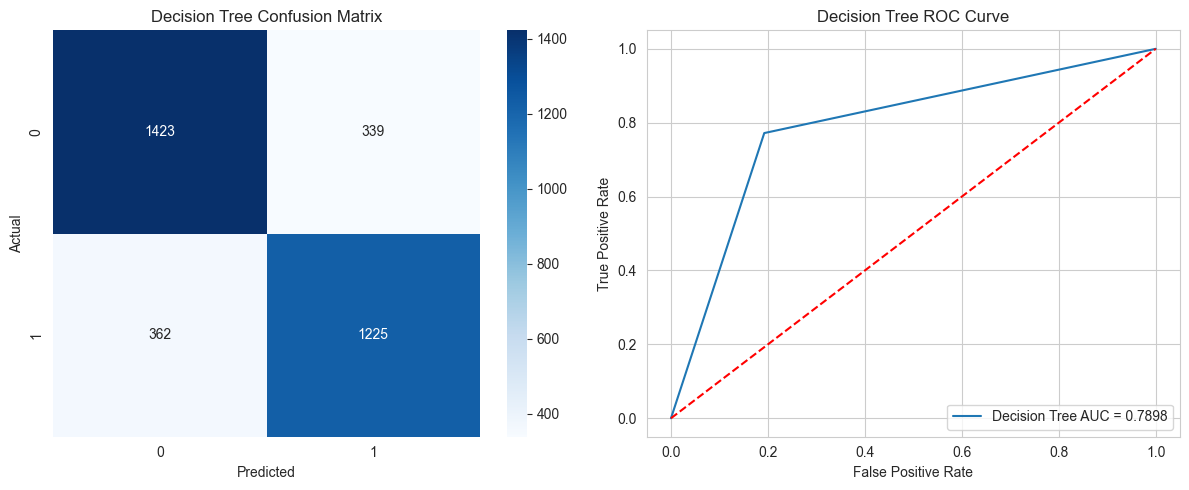

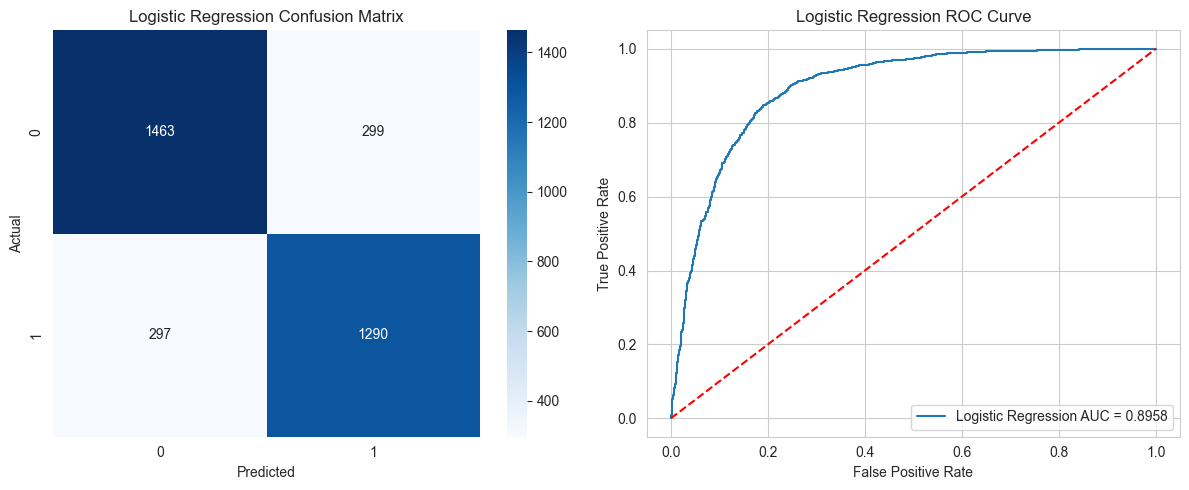

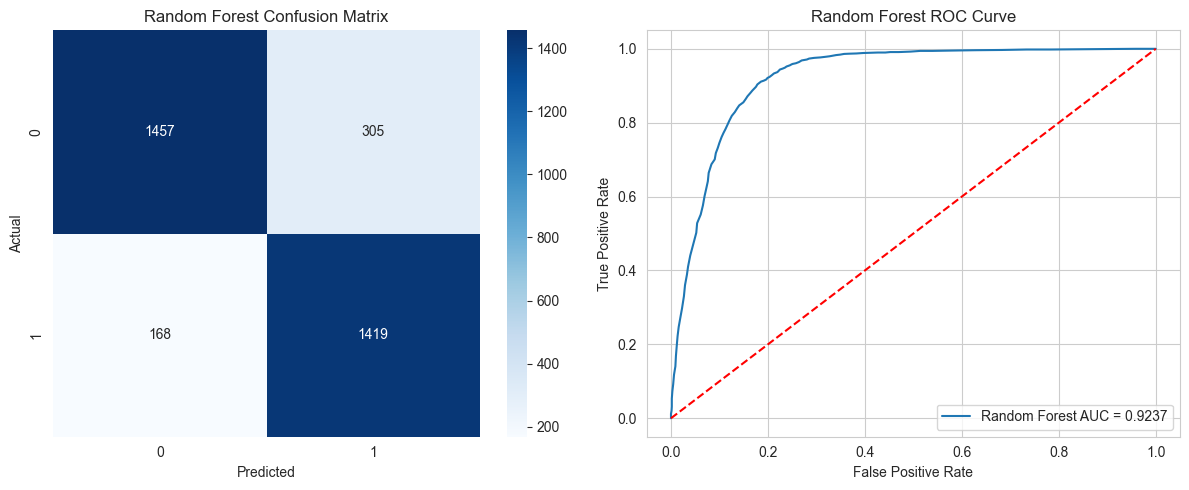

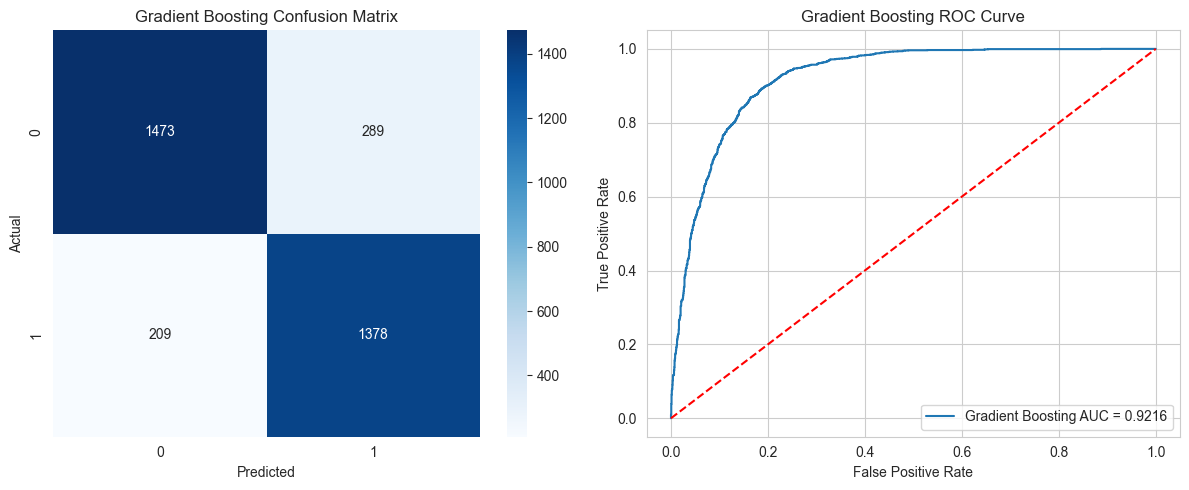

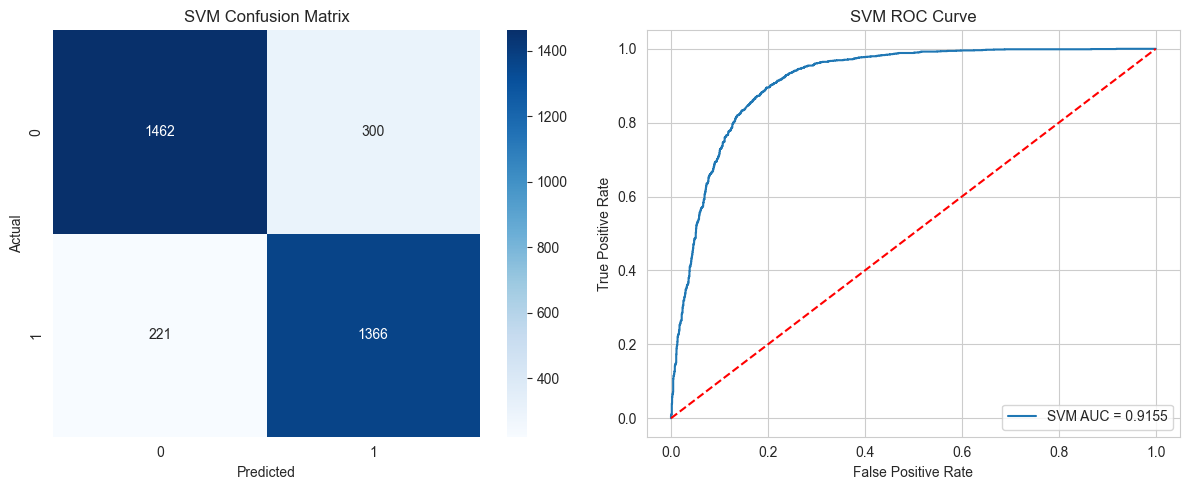

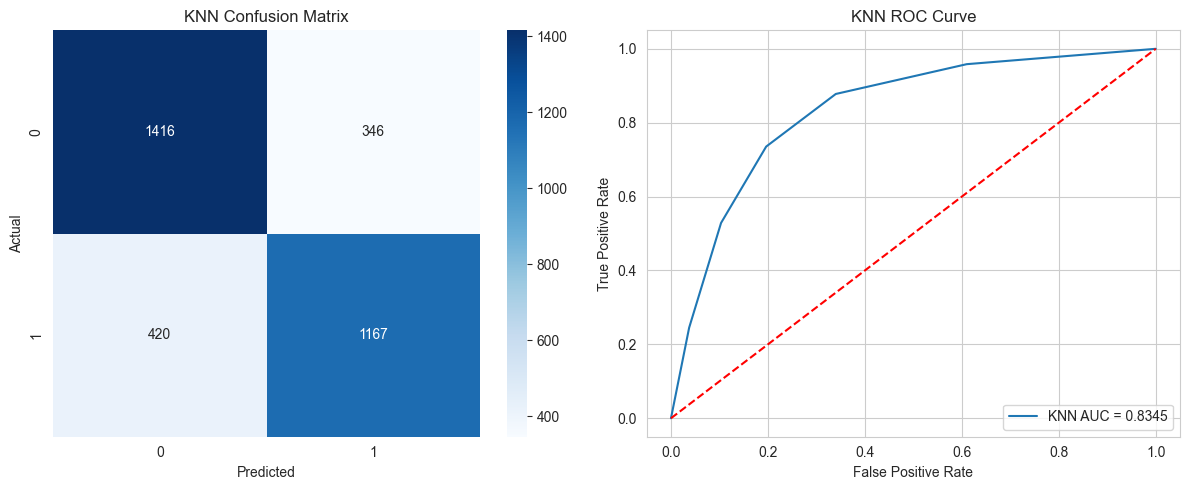

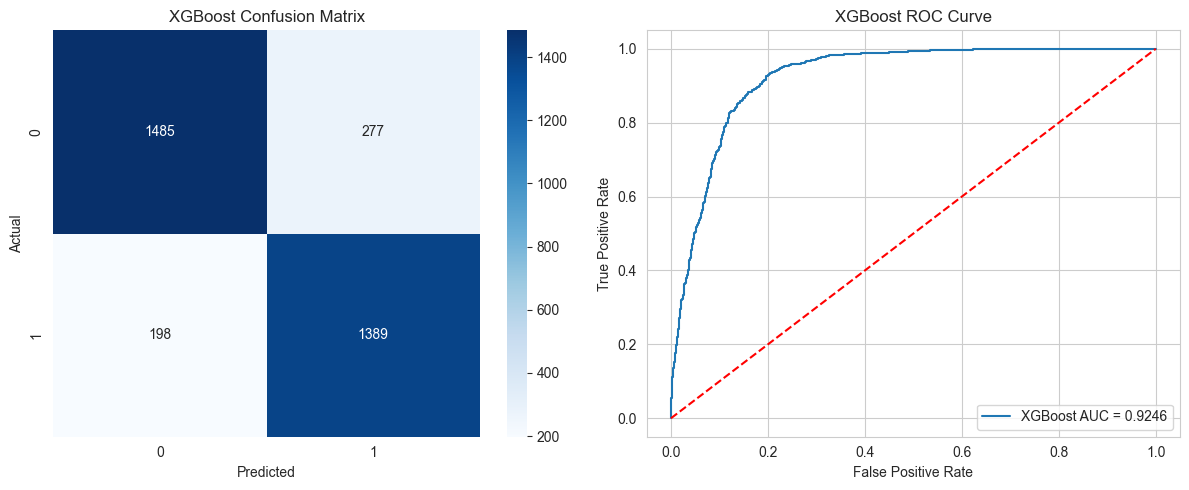

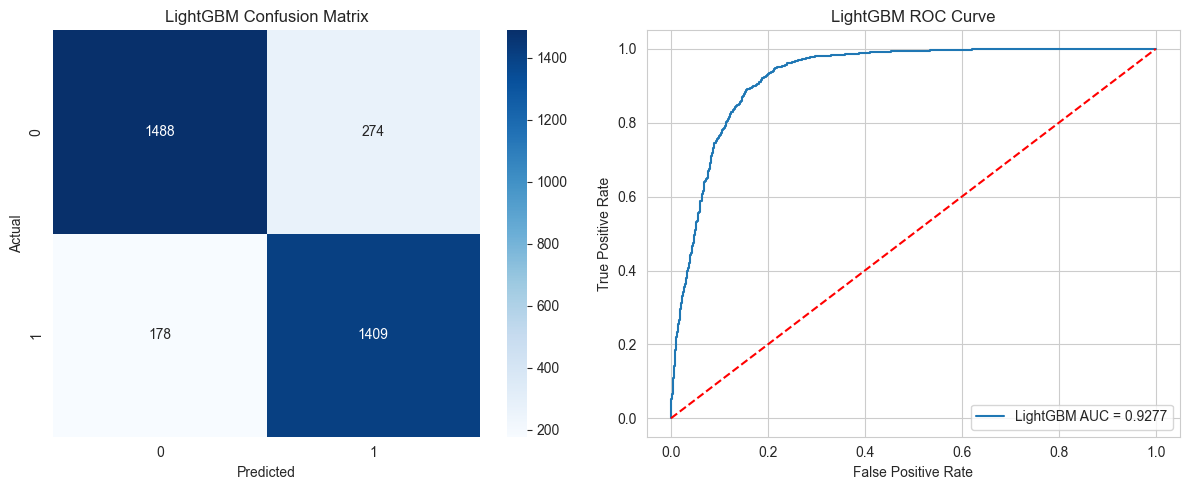

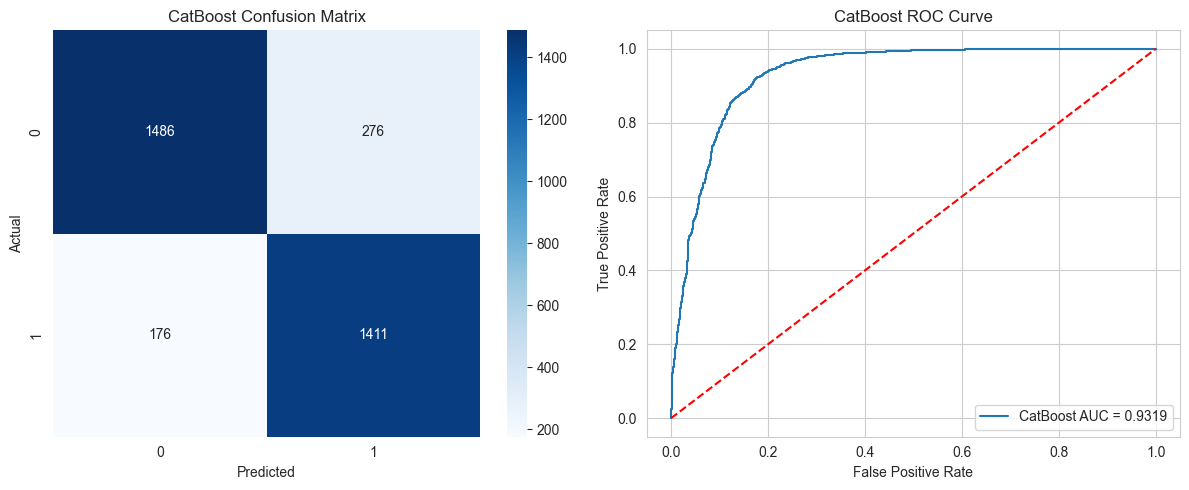

In [159]:
model_accuracies = {}
# AUC 값을 저장할 딕셔너리
auc_values = {}
feature_importances = pd.DataFrame(index=X_train.columns)

# 모델별로 반복하여 혼동 행렬 및 ROC 곡선 생성
for name, model in models.items():
    # 모델 학습
    model.fit(X_train_resampled_ov, y_train_resampled_ov)

    # 예측 수행
    y_pred = model.predict(X_test_scaled)

    # 정확도 계산 및 저장
    over_accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = over_accuracy

    # 특성 중요도가 있는 경우 특성 중요도 저장
    if hasattr(model, "feature_importances_"):
        feature_importances[name] = model.feature_importances_

    # 혼동 행렬 시각화
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

    # ROC 곡선 및 AUC 시각화
    if hasattr(model, "predict_proba"):
        plt.subplot(1, 2, 2)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        auc_values[name] = auc
        plt.plot(fpr, tpr, label=f"{name} AUC = {auc:.4f}")
        plt.plot([0, 1], [0, 1], "r--")
        plt.title(f"{name} ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

### Accuracy


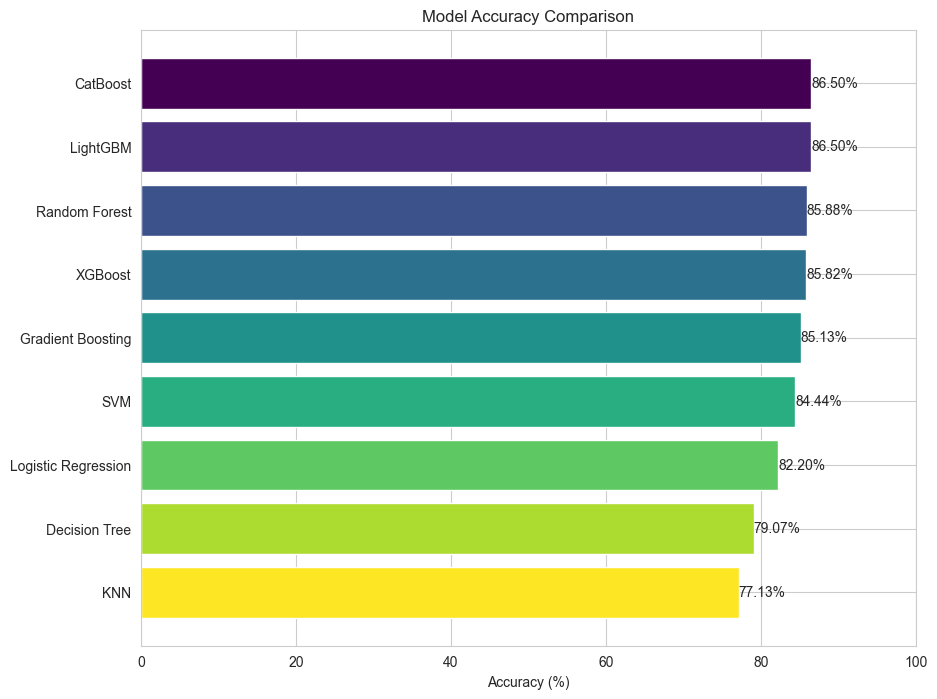

In [160]:
sorted_accuracies = sorted(model_accuracies.items(), key=lambda x: x[1])
accuracy_df = pd.DataFrame(sorted_accuracies, columns=["Model", "Accuracy"])

# 색상 지정
colors = plt.cm.viridis(np.linspace(1, 0, len(accuracy_df)))

# 모든 모델의 정확도 비교 시각화
plt.figure(figsize=(10, 8))
bars = plt.barh(accuracy_df["Model"],
                accuracy_df["Accuracy"] * 100, color=colors)
plt.xlabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.xlim([0, 100])

# 바 위에 수치 표시
for bar, acc in zip(bars, accuracy_df["Accuracy"]):
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{acc*100:.2f}%",
        va="center",
        ha="left",
    )

plt.show()

### AUC (Area under the ROC Curve)

AUC 값은 모델이 클래스를 얼마나 잘 분류하는지를 나타내는 지표 중 하나로, 값이 높을수록 모델의 성능이 좋다고 평가한다. 1에 가까울수록 완벽한 분류 성능을 나타낸다.


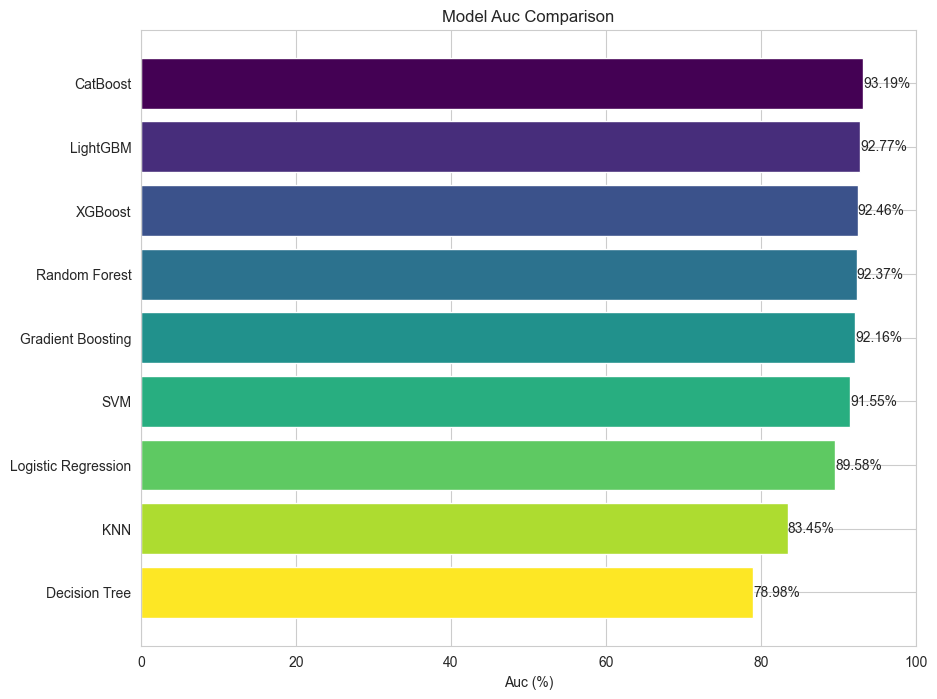

In [161]:
sorted_auc_values = sorted(auc_values.items(), key=lambda x: x[1])
accuracy_df = pd.DataFrame(sorted_auc_values, columns=["Model", "Auc"])


# 색상 지정
colors = plt.cm.viridis(np.linspace(1, 0, len(accuracy_df)))

# 모든 모델의 정확도 비교 시각화
plt.figure(figsize=(10, 8))
bars = plt.barh(accuracy_df["Model"], accuracy_df["Auc"] * 100, color=colors)
plt.xlabel("Auc (%)")
plt.title("Model Auc Comparison")
plt.xlim([0, 100])

# 바 위에 수치 표시
for bar, acc in zip(bars, accuracy_df["Auc"]):
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{acc*100:.2f}%",
        va="center",
        ha="left",
    )

plt.show()

## Feature Importance

특성 중요도(Feature Importance)란 머신러닝 모델이 학습한 후에 각 특성이 결과에 얼마나 영향을 미치는지를 나타내는 지표이다. 일반적으로 특성 중요도는 모델링 과정에서 다양한 방법으로 계산될 수 있다. 예를 들어, 결정 트리 기반의 모델에서는 각 특성이 분기점을 선택하는 데 얼마나 중요한지를 측정하여 특성 중요도를 계산한다. 특성 중요도를 분석하면 어떤 특성이 모델의 예측에 가장 큰 영향을 미치는지를 파악할 수 있으며, 이를 통해 모델을 해석하고 개선하는 데 도움이 된다.


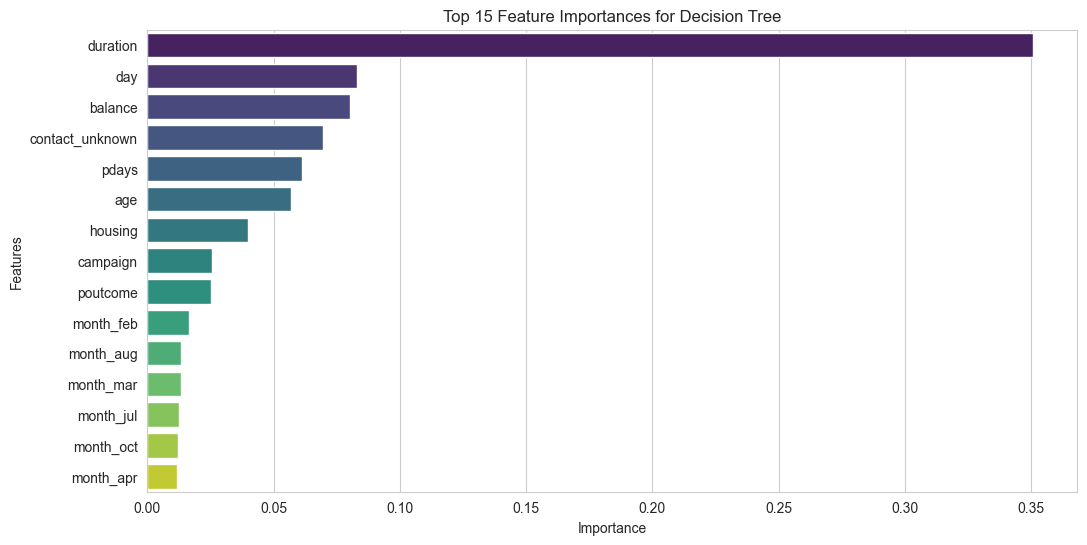


Feature Importances for Decision Tree:


Decision Tree
duration              0.350787
day                   0.082956
balance               0.080280
contact_unknown       0.069518
pdays                 0.061222
age                   0.057044
housing               0.039813
campaign              0.025532
poutcome              0.025005
month_feb             0.016544
month_aug             0.013403
month_mar             0.013271
month_jul             0.012622
month_oct             0.012233
month_apr             0.011623

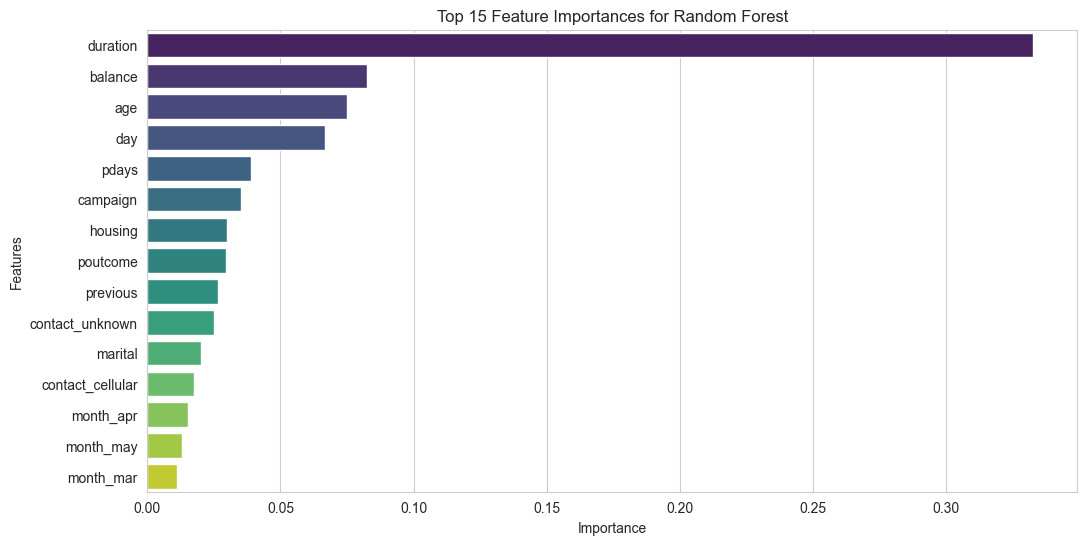


Feature Importances for Random Forest:


Random Forest
duration               0.332794
balance                0.082533
age                    0.074874
day                    0.066738
pdays                  0.038876
campaign               0.035028
housing                0.029782
poutcome               0.029466
previous               0.026700
contact_unknown        0.024902
marital                0.020194
contact_cellular       0.017546
month_apr              0.015093
month_may              0.013096
month_mar              0.011290

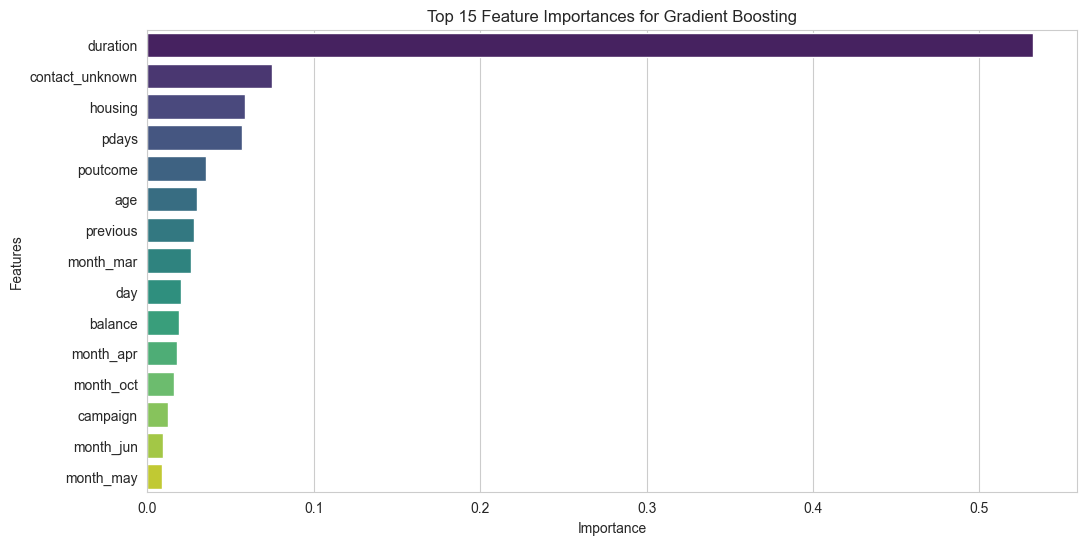


Feature Importances for Gradient Boosting:


Gradient Boosting
duration                  0.532307
contact_unknown           0.074713
housing                   0.058625
pdays                     0.057047
poutcome                  0.035245
age                       0.029733
previous                  0.028078
month_mar                 0.026115
day                       0.020322
balance                   0.019263
month_apr                 0.017692
month_oct                 0.016273
campaign                  0.012441
month_jun                 0.009354
month_may                 0.008602

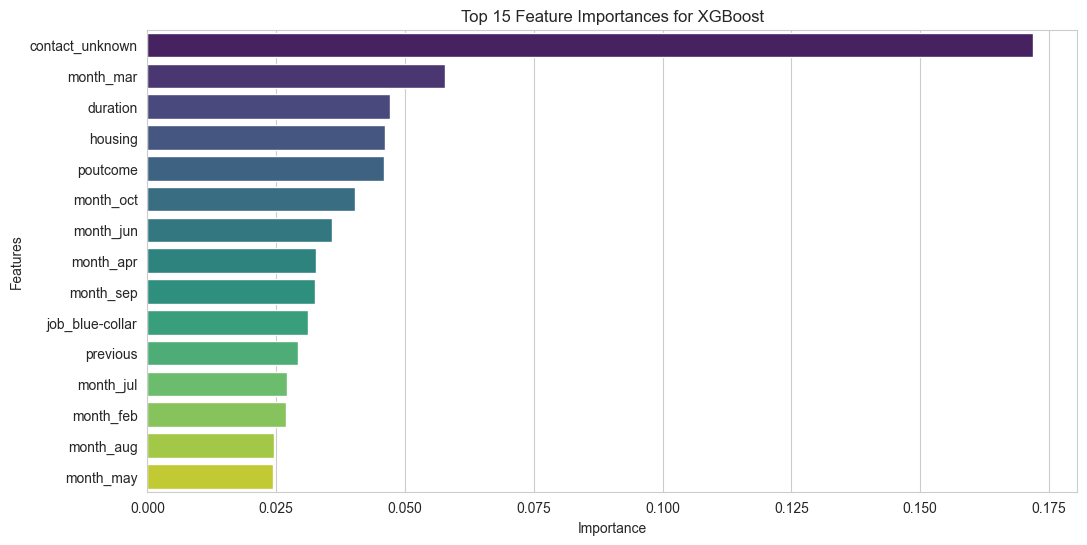


Feature Importances for XGBoost:


XGBoost
contact_unknown  0.171945
month_mar        0.057857
duration         0.047170
housing          0.046086
poutcome         0.045999
month_oct        0.040356
month_jun        0.035912
month_apr        0.032751
month_sep        0.032550
job_blue-collar  0.031155
previous         0.029148
month_jul        0.027049
month_feb        0.026932
month_aug        0.024540
month_may        0.024311

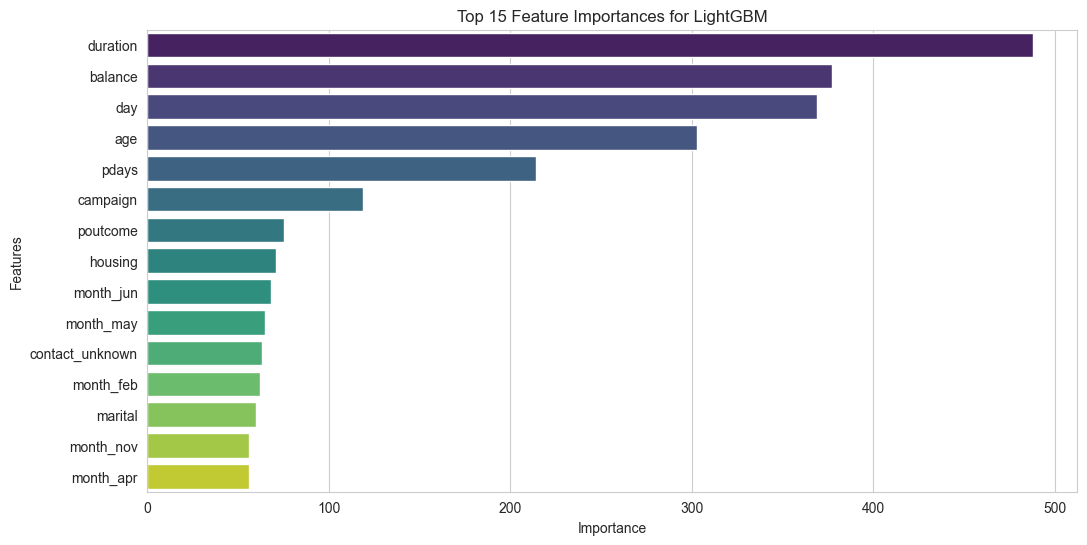


Feature Importances for LightGBM:


LightGBM
duration              488
balance               377
day                   369
age                   303
pdays                 214
campaign              119
poutcome               75
housing                71
month_jun              68
month_may              65
contact_unknown        63
month_feb              62
marital                60
month_nov              56
month_apr              56

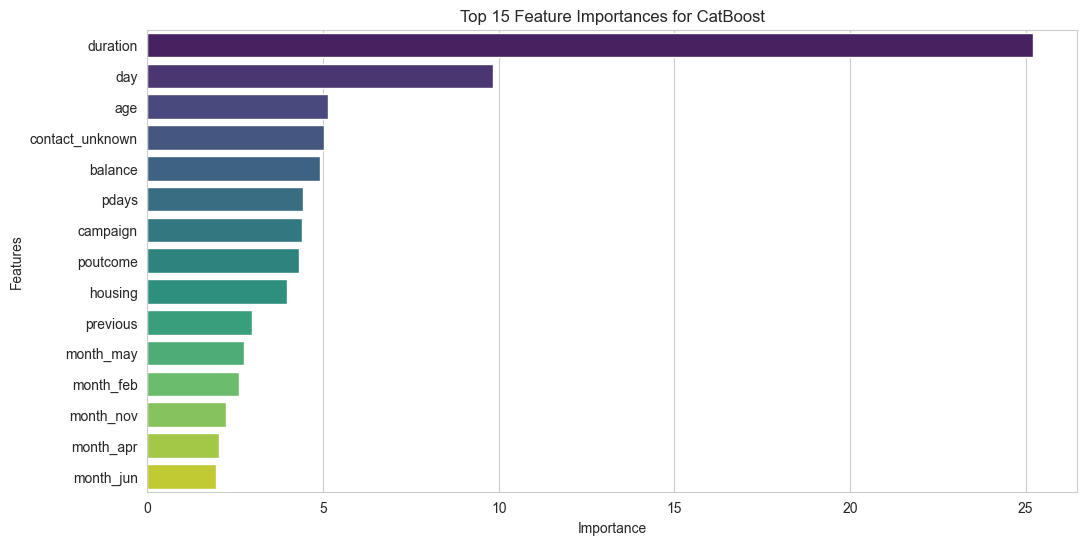


Feature Importances for CatBoost:


CatBoost
duration         25.210184
day               9.832620
age               5.133430
contact_unknown   5.019388
balance           4.901547
pdays             4.423259
campaign          4.393296
poutcome          4.323207
housing           3.977346
previous          2.979757
month_may         2.756275
month_feb         2.608041
month_nov         2.236792
month_apr         2.028473
month_jun         1.964423

In [162]:
# 각 모델에 대해 특성 중요도 시각화와 출력
for name in feature_importances.columns:
    # 특성 중요도 상위 10개 선택
    top_features = feature_importances[name].sort_values(ascending=False).head(15)

    # 시각화
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
    plt.title(f"Top 15 Feature Importances for {name}")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

    # 출력
    sorted_feature_importances = (
        feature_importances[name].sort_values(ascending=False).head(15)
    )
    print(f"\nFeature Importances for {name}:")
    display(sorted_feature_importances.to_frame())

## 특성 중요도 분석 결과

### 통화 시간 (Duration)

- 모든 모델에서 통화 시간의 중요도가 높게 나타남.
- Gradient Boosting에서는 중요도가 53.23%로 매우 높게 나타남.
- 고객과의 상호작용 시간이 길수록 제품이나 서비스에 대한 설명을 충분히 할 수 있으며, 구매 결정에 긍정적으로 작용할 수 있음.

### 나이 (Age)

- Random Forest와 LightGBM에서 중요도가 높게 나타남.
- 특정 연령대가 특정 제품이나 서비스에 더 호응할 수 있음을 의미함.
- 연령을 고려한 타겟 마케팅이 중요함.

### 잔고 (Balance)

- LightGBM에서 매우 높은 중요도를 보임.
- 고객의 재정 상태가 금융 서비스나 상품 선택에 큰 영향을 미칠 수 있음.

### 주택 대출 (Housing) 및 개인 대출 (Loan)

- Gradient Boosting과 XGBoost에서 중요도를 보임.
- 고객의 금융 상태와 투자 성향을 반영할 수 있는 변수로, 금융 상품 타겟팅에 중요함.

### 직업 (Job)

- 특정 직업군이 CatBoost와 XGBoost에서 높은 중요도를 보임.
- 특정 직업군이 특정 상품에 더 관심을 보일 수 있음을 시사함.

### 연락 수단 (Contact)

- CatBoost에서 매우 높은 중요도를 보임.
- 마케팅 캠페인의 성공에 연락 수단의 최적화가 중요함을 나타냄.
